In [1]:
#Import pandas for data management and matplotlib for graphics.
#Importamos pandas para el manejo de datos y matplotlib para las graficas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

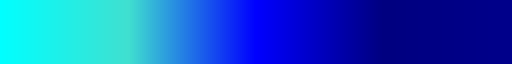

In [2]:
sns.blend_palette(["cyan","turquoise","blue","navy","darkblue"],12,as_cmap=True)

In [3]:
Rp=sns.blend_palette(["cyan","turquoise","blue","navy","darkblue"],12)

In [4]:
Rp

[(0.0, 1.0, 1.0),
 (0.09054978854286813, 0.9561399461745482, 0.9335024990388312),
 (0.18109957708573626, 0.9122798923490965, 0.8670049980776624),
 (0.23031141868512112, 0.8060899653979239, 0.8308650519031142),
 (0.1358246828143022, 0.47538638985005766, 0.9002537485582468),
 (0.04527489427143408, 0.1584621299500193, 0.9667512495194156),
 (0.0, 0.0, 0.910157631680123),
 (0.0, 0.0, 0.7304728950403692),
 (0.0, 0.0, 0.5429757785467129),
 (0.0, 0.0, 0.5139715494040753),
 (0.0, 0.0, 0.5295347943098808),
 (0.0, 0.0, 0.5450980392156862)]

In [5]:
#Import data from a csv file into a dataframe.
#Importamos los datos desde un csv a un dataframe.
download_root = 'https://raw.githubusercontent.com/CristianRiveraEsparza/MyBDCRE/main/'
tortillas = 'Tortillas/tortilla_prices.csv'
df_tortillas = pd.read_csv(download_root + tortillas)

In [6]:
#Check the first five records to make sure everything it's ok.
#Revisamos los primeros cinco registros para ver que todo esta bien.
df_tortillas.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


In [7]:
#Now check the last five records.
#Ahora chequemos los ultimos cinco registros.
df_tortillas.tail()

,State,City,Year,Month,Day,Store type,Price per kilogram
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40
284393,Zacatecas,Zacatecas,2024,7,8,Big Retail Store,13.53


In [8]:
#Now see how many records each colunm has.
#Ahora veamos que tantos registros tiene cada columna.
df_tortillas.count()

,0
State,284394
City,284394
Year,284394
Month,284394
Day,284394
Store type,284394
Price per kilogram,278004


In [9]:
#There's a column that has fewer records than the others, let's see the difference.
#Hay una columna que tiene menos registros que las otras, veamos la diferencia.
df_tortillas["State"].count()-df_tortillas["Price per kilogram"].count()

6390

In [10]:
#Let's fill all the NaN values with a monthly average.
#Llenemos todos los valores NaN con promedios mensuales.
df_tortillas.groupby(["State","Year","Month","Store type"])["Price per kilogram"].mean().round(2)

State           Year  Month  Store type       
Aguascalientes  2007  1      Big Retail Store      5.81
                             Mom and Pop Store     9.86
                      2      Big Retail Store      5.77
                             Mom and Pop Store     9.80
                      3      Big Retail Store      5.77
                                                  ...  
Zacatecas       2024  5      Mom and Pop Store    22.00
                      6      Big Retail Store     13.76
                             Mom and Pop Store    22.00
                      7      Big Retail Store     13.53
                             Mom and Pop Store    22.00
Name: Price per kilogram, Length: 13504, dtype: float64

In [11]:
#We created a DataFrame where the data is grouped by month for greater precision.
#Creamos un DF donde la inforacion esta agrupada por mes para mayor precision.
promedio_precios=df_tortillas.groupby(["State", "Year", "Month", "Store type"])["Price per kilogram"].mean().round(2).reset_index()

In [12]:
promedio_precios

,State,Year,Month,Store type,Price per kilogram
0,Aguascalientes,2007,1,Big Retail Store,5.81
1,Aguascalientes,2007,1,Mom and Pop Store,9.86
2,Aguascalientes,2007,2,Big Retail Store,5.77
3,Aguascalientes,2007,2,Mom and Pop Store,9.80
4,Aguascalientes,2007,3,Big Retail Store,5.77
...,...,...,...,...,...
13499,Zacatecas,2024,5,Mom and Pop Store,22.00
13500,Zacatecas,2024,6,Big Retail Store,13.76
13501,Zacatecas,2024,6,Mom and Pop Store,22.00
13502,Zacatecas,2024,7,Big Retail Store,13.53


In [13]:
promedio_precios['State'].unique()

array(['Aguascalientes', 'Baja\xa0California',
       'Baja\xa0California\xa0Sur', 'Campeche', 'Chiapas', 'Chihuahua',
       'Coahuila', 'Colima', 'D.F.', 'Durango', 'Edo.\xa0México',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán',
       'Morelos', 'Nayarit', 'Nuevo\xa0León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana\xa0Roo', 'San\xa0Luis\xa0Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz',
       'Yucatán', 'Zacatecas'], dtype=object)

In [14]:
#Turn the DF into a dictionary
#Comvertimos el DF a un diccionario
promedio_dict = promedio_precios.set_index(["State", "Year", "Month", "Store type"])["Price per kilogram"].to_dict()
#promedio_dict

In [15]:
#We'll use a function
#Vamos a usar una funcion
def rellenar_precio(row):
    #This line checks if there is any missing data ('NaN') in the 'Price per kilogram' row.
    #Esta linea checa si es que hay algun dato no capturado ('NaN') en la columna 'Price per kilogram'.
    if pd.isna(row["Price per kilogram"]):
        #If there's a NaN, this line looks for a price based on the dictionary we created.
        #Si hay un NaN, esta linea busca por un precio basado en el diccionario que creamos.
        return promedio_dict.get((row["State"], row["Year"], row["Month"], row["Store type"]), row["Price per kilogram"])
    #If there's no NaN, this line return the original price.
    #Si no hay NaN, esta linea regresa el precio original.
    return row["Price per kilogram"]
#Here we apply the function to the DF.
#Aqui aplicamos la funcion al DF.
df_tortillas["Price per kilogram"] = df_tortillas.apply(rellenar_precio, axis=1)

In [16]:
#Now it's already done.
#Ahora ya esta hecho.
df_tortillas

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,10.61
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
...,...,...,...,...,...,...,...
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40


In [17]:
#Well... actually no, there are still some missing prices.
#Bueno... de hecho no, ahi siguen algunos precios perdidos.
df_tortillas[df_tortillas['Price per kilogram'].isna()]

,State,City,Year,Month,Day,Store type,Price per kilogram
199951,San Luis Potosí,San Luis Potosí,2019,6,3,Mom and Pop Store,NaN
199956,Tabasco,Villahermosa,2019,6,3,Mom and Pop Store,NaN
200005,San Luis Potosí,San Luis Potosí,2019,6,5,Mom and Pop Store,NaN
200010,Tabasco,Villahermosa,2019,6,5,Mom and Pop Store,NaN
200059,San Luis Potosí,San Luis Potosí,2019,6,7,Mom and Pop Store,NaN
...,...,...,...,...,...,...,...
237324,Guerrero,Chilpancingo,2021,2,24,Big Retail Store,NaN
237374,Guanajuato,Celaya,2021,2,26,Big Retail Store,NaN
237375,Guanajuato,León,2021,2,26,Big Retail Store,NaN
237376,Guerrero,Acapulco,2021,2,26,Big Retail Store,NaN


In [18]:
df_tortillas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284394 entries, 0 to 284393
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               284394 non-null  object 
 1   City                284394 non-null  object 
 2   Year                284394 non-null  int64  
 3   Month               284394 non-null  int64  
 4   Day                 284394 non-null  int64  
 5   Store type          284394 non-null  object 
 6   Price per kilogram  282218 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 15.2+ MB


In [19]:
df_tortillas[(df_tortillas['Year']==2019)&(df_tortillas['Month']==6)&(df_tortillas['State']=='San\xa0Luis\xa0Potosí')]

,State,City,Year,Month,Day,Store type,Price per kilogram
199951,San Luis Potosí,San Luis Potosí,2019,6,3,Mom and Pop Store,NaN
200005,San Luis Potosí,San Luis Potosí,2019,6,5,Mom and Pop Store,NaN
200059,San Luis Potosí,San Luis Potosí,2019,6,7,Mom and Pop Store,NaN
200113,San Luis Potosí,San Luis Potosí,2019,6,10,Mom and Pop Store,NaN
200167,San Luis Potosí,San Luis Potosí,2019,6,12,Mom and Pop Store,NaN
200221,San Luis Potosí,San Luis Potosí,2019,6,14,Mom and Pop Store,NaN
200275,San Luis Potosí,San Luis Potosí,2019,6,17,Mom and Pop Store,NaN
200329,San Luis Potosí,San Luis Potosí,2019,6,19,Mom and Pop Store,NaN
200383,San Luis Potosí,San Luis Potosí,2019,6,21,Mom and Pop Store,NaN
200437,San Luis Potosí,San Luis Potosí,2019,6,24,Mom and Pop Store,NaN


In [20]:
promedio_dict['San\xa0Luis\xa0Potosí', 2019, 6, 'Big Retail Store']

nan

In [21]:
promedio_dict['San\xa0Luis\xa0Potosí', 2019, 6, 'Mom and Pop Store']

nan

In [22]:
#Let's fill in the remaining data using the same process, but this time based on the year.
#LLenemos los datos restantes con el mismo proceso, pero esta vez basado en el año.
promedio_precios=df_tortillas.groupby(["State", "Year", "Store type"])["Price per kilogram"].mean().round(2).reset_index()

In [23]:
promedio_precios

,State,Year,Store type,Price per kilogram
0,Aguascalientes,2007,Big Retail Store,5.77
1,Aguascalientes,2007,Mom and Pop Store,9.66
2,Aguascalientes,2008,Big Retail Store,5.76
3,Aguascalientes,2008,Mom and Pop Store,9.77
4,Aguascalientes,2009,Big Retail Store,5.81
...,...,...,...,...
1147,Zacatecas,2022,Mom and Pop Store,18.64
1148,Zacatecas,2023,Big Retail Store,13.54
1149,Zacatecas,2023,Mom and Pop Store,20.71
1150,Zacatecas,2024,Big Retail Store,13.55


In [24]:
promedio_dict = promedio_precios.set_index(["State", "Year", "Store type"])["Price per kilogram"].to_dict()

In [25]:
def rellenar_precio(row):
    if pd.isna(row["Price per kilogram"]):
        return promedio_dict.get((row["State"], row["Year"], row["Store type"]), row["Price per kilogram"])
    return row["Price per kilogram"]

df_tortillas["Price per kilogram"] = df_tortillas.apply(rellenar_precio, axis=1)

In [26]:
df_tortillas.head(5)

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,10.61
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00


In [27]:
df_tortillas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284394 entries, 0 to 284393
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               284394 non-null  object 
 1   City                284394 non-null  object 
 2   Year                284394 non-null  int64  
 3   Month               284394 non-null  int64  
 4   Day                 284394 non-null  int64  
 5   Store type          284394 non-null  object 
 6   Price per kilogram  284394 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 15.2+ MB


In [28]:
#Now it's all filled. Both processes worked; we only had some missing data in the first process
#because certain months didn’t have data. So, for the remaining data, we used information based on years.
#Ahora esta totalmente llenado, ambos procesos funcionaron, solo tuvimos algunos datos perdidos con el primer proceso
#porque algunos meses no tenian datos, asi que para los datos restantes usamos informacion basada en años.
df_tortillas[df_tortillas['Price per kilogram'].isna()]

,State,City,Year,Month,Day,Store type,Price per kilogram


In [29]:
#Now let's see some quick stadistics.
#Veamos unas estadisticas rapidas.
df_tortillas.count()

,0
State,284394
City,284394
Year,284394
Month,284394
Day,284394
Store type,284394
Price per kilogram,284394


In [30]:
df_tortillas.shape

(284394, 7)

In [31]:
df_tortillas["Price per kilogram"].mean()

12.226317257044803

In [32]:
df_tortillas['Price per kilogram'].describe().round(1)

,Price per kilogram
count,284394.0
mean,12.2
std,4.5
min,0.0
25%,9.6
50%,11.2
75%,14.1
max,31.0


In [33]:
#There's a zero in one of the most important columns, if there are a lot, it could be a problem, let's check that.
#Hay un cero en una de las columnas mas importantes, si hay muchos prodria ser un problema, chequemos eso.
df_tortillas.min()

,0
State,Aguascalientes
City,Acapulco
Year,2007
Month,1
Day,1
Store type,Big Retail Store
Price per kilogram,0.0


In [34]:
total_ceros = (df_tortillas["Price per kilogram"] == 0).sum()

In [35]:
#it's just one, there's no problem, let's see other values.
#Solo es uno, no hay problema, veamos otros valores.
total_ceros

1

In [36]:
df_tortillas[df_tortillas["Price per kilogram"]==0]

,State,City,Year,Month,Day,Store type,Price per kilogram
45191,Guanajuato,Irapuato,2009,9,9,Big Retail Store,0.0


In [37]:
#Let's see if it includes all the states of the contry.
#Veamos si incluye todos los estados del pais.
df_tortillas["State"].unique()

array(['Aguascalientes', 'Baja\xa0California',
       'Baja\xa0California\xa0Sur', 'Campeche', 'Coahuila', 'Colima',
       'Chiapas', 'Chihuahua', 'D.F.', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Edo.\xa0México', 'Michoacán',
       'Morelos', 'Nayarit', 'Nuevo\xa0León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana\xa0Roo', 'San\xa0Luis\xa0Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz',
       'Yucatán', 'Zacatecas'], dtype=object)

In [38]:
#We can see that it includes all the states, but not all the citys.
#Vemos que incluye todos los estados pero no todas las ciudades.
df_tortillas[df_tortillas["State"]=="Guanajuato"]["City"].unique()

array(['Irapuato', 'León', 'Celaya'], dtype=object)

In [39]:
df_tortillas["City"].unique()

array(['Aguascalientes', 'Mexicali', 'Tijuana', 'La\xa0Paz', 'Campeche',
       'Piedras\xa0Negras', 'Saltillo', 'Colima', 'Tapachula',
       'Tuxtla\xa0Gutiérrez', 'Chihuahua', 'Cd.\xa0Juárez', 'D.F.',
       'ZM\xa0D.F.', 'Durango', 'Gómez\xa0Palacio', 'Irapuato', 'León',
       'Acapulco', 'Chilpancingo', 'Pachuca', 'Guadalajara',
       'ZM\xa0Guadalajara', 'Toluca', 'Morelia', 'Cuernavaca', 'Tepic',
       'Monterrey', 'ZM\xa0Monterrey', 'Oaxaca', 'Puebla', 'ZM\xa0Puebla',
       'Querétaro', 'Cancún', 'Chetumal', 'San\xa0Luis\xa0Potosí',
       'Culiacán', 'Cd.\xa0Obregón', 'Hermosillo', 'Nogales',
       'Villahermosa', 'Cd.\xa0Victoria', 'Matamoros', 'Nuevo\xa0Laredo',
       'Reynosa', 'Tampico', 'Tlaxcala', 'Coatzacoalcos', 'Poza\xa0Rica',
       'Veracruz', 'Xalapa', 'Mérida', 'Zacatecas', 'Torreón', 'Celaya',
       'San\xa0Luis\xa0Río\xa0Colorado'], dtype=object)

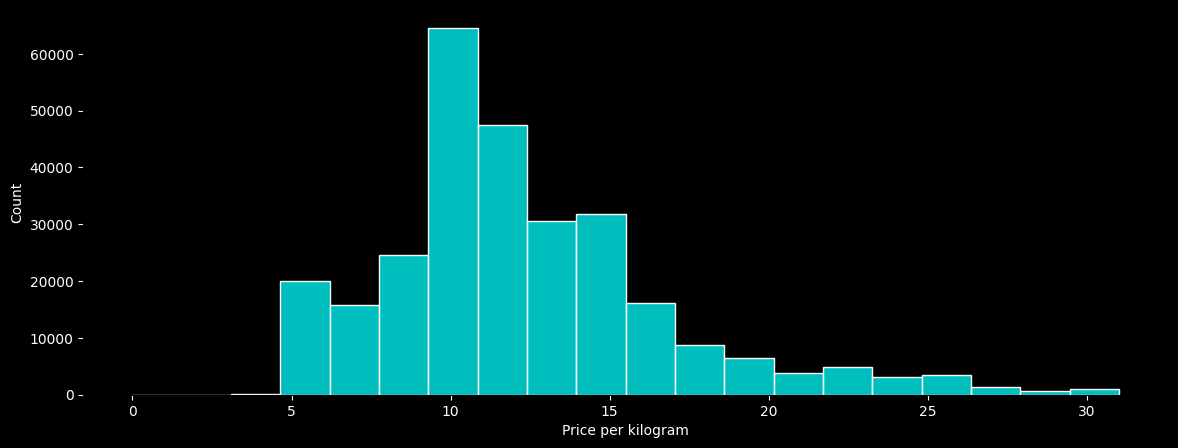

In [40]:
#Let's see the distribution.
#Veamos la distribucion.
plt.figure(figsize=(14,5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
sns.histplot(df_tortillas['Price per kilogram'], bins=20, color='cyan', edgecolor='white')
plt.savefig('price_distribution_1.png')
plt.show()

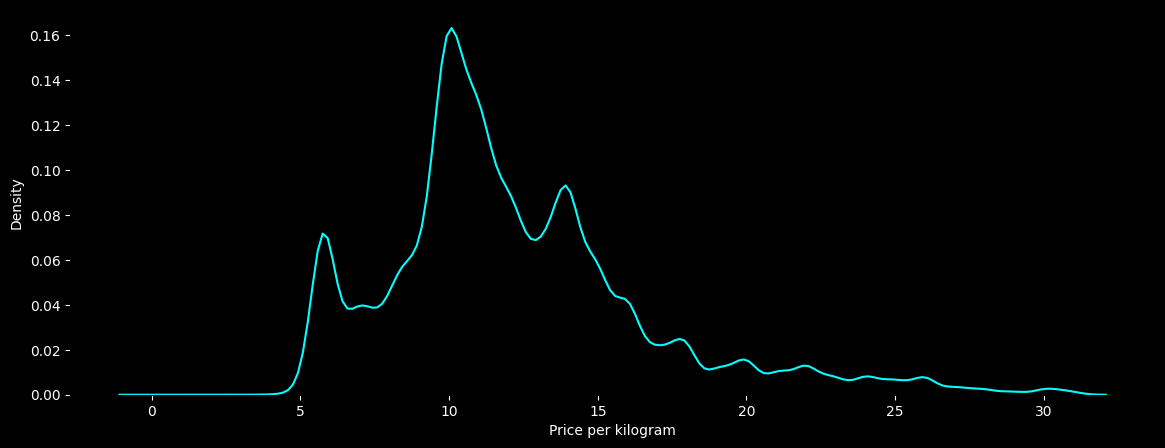

In [41]:
#Let's see the distribution.
#Veamos la distribucion.
plt.figure(figsize=(14,5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
sns.kdeplot(df_tortillas['Price per kilogram'], color='cyan')
plt.savefig('price_kde_1.png')
plt.show()

In [42]:
df_tortillas["Price per kilogram"].skew()

1.1924523986295992

In [43]:
df_tortillas["Price per kilogram"].kurt()

1.9368809902944224

In [44]:
import geopandas as gpd

In [45]:
!wget https://raw.githubusercontent.com/CristianRiveraEsparza/MyBDCRE/main/Tortillas/Mapa%20Mex/Mapa_Mex.zip -O Mapa_Mex.zip
!unzip Mapa_Mex.zip -d Mapa_Mex

--2025-02-28 19:09:34--  https://raw.githubusercontent.com/CristianRiveraEsparza/MyBDCRE/main/Tortillas/Mapa%20Mex/Mapa_Mex.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53193523 (51M) [application/zip]
Saving to: ‘Mapa_Mex.zip’

Mapa_Mex.zip        100%[===================>]  50.73M  73.6MB/s    in 0.7s    

2025-02-28 19:09:37 (73.6 MB/s) - ‘Mapa_Mex.zip’ saved [53193523/53193523]

Archive:  Mapa_Mex.zip
 extracting: Mapa_Mex/Mapa Mex/gadm41_MEX_0.cpg  
  inflating: Mapa_Mex/Mapa Mex/gadm41_MEX_0.dbf  
  inflating: Mapa_Mex/Mapa Mex/gadm41_MEX_0.prj  
  inflating: Mapa_Mex/Mapa Mex/gadm41_MEX_0.shp  
  inflating: Mapa_Mex/Mapa Mex/gadm41_MEX_0.shx  
 extracting: Mapa_Mex/Mapa Mex/gadm41_MEX_1.cpg  
  inflating: Mapa_Mex/Mapa Mex/gadm41_MEX_1.dbf  
  

In [46]:
mapa = gpd.read_file("Mapa_Mex/Mapa Mex/gadm41_MEX_1.shp")

In [47]:
mapa.head(3)

Output hidden; open in https://colab.research.google.com to view.

In [48]:
#We make a DF grouped by State to merge with the Geopandas Object.
#Creamos un DF agrupado por estado para unir con el objeto de Geopandas.
conteo_estados= df_tortillas['State'].value_counts().reset_index()
conteo_estados.columns=['State','Count_Total']

In [49]:
conteo_estados.head(3)

,State,Count_Total
0,Tamaulipas,26400
1,Veracruz,18878
2,Sonora,17816


In [50]:
mapa=mapa.merge(conteo_estados, left_on='NAME_1', right_on='State', how='left')

In [51]:
mapa.head(3)

Output hidden; open in https://colab.research.google.com to view.

In [52]:
#Some data in the object doesn't appear
#Algunos datos en el objeto no aparecen
mapa[pd.isna(mapa['State'])]

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,State,Count_Total
1,MEX.3_1,MEX,México,Baja California,NA,NA,Estado,State,NA,MX.BN,MX-BCN,"MULTIPOLYGON (((-114.12282 28.00795, -114.1219...",NaN,NaN
2,MEX.2_1,MEX,México,Baja California Sur,NA,NA,Estado,State,NA,MX.BS,MX-BCS,"MULTIPOLYGON (((-109.91041 22.8795, -109.91027...",NaN,NaN
8,MEX.9_1,MEX,México,Distrito Federal,NA,NA,Distrito Federal,Federal District,NA,MX.DF,NA,"POLYGON ((-98.96683 19.20896, -98.96686 19.208...",NaN,NaN
14,MEX.15_1,MEX,México,México,NA,NA,Estado,State,NA,MX.MX,NA,"POLYGON ((-100.23023 18.43189, -100.23075 18.4...",NaN,NaN
18,MEX.19_1,MEX,México,Nuevo León,NA,NA,Estado,State,NA,MX.NL,NA,"POLYGON ((-99.92398 23.39133, -99.92125 23.379...",NaN,NaN
22,MEX.23_1,MEX,México,Quintana Roo,NA,NA,Estado,State,NA,MX.QR,MX-ROO,"MULTIPOLYGON (((-87.89473 18.25963, -87.89367 ...",NaN,NaN
23,MEX.24_1,MEX,México,San Luis Potosí,NA,NA,Estado,State,NA,MX.SL,NA,"POLYGON ((-98.82637 21.16228, -98.82654 21.162...",NaN,NaN


In [53]:
map_dict = mapa.set_index("NAME_1")["Count_Total"].to_dict()

In [54]:
map_dict

{'Aguascalientes': 5280.0,
 'Baja California': nan,
 'Baja California Sur': nan,
 'Campeche': 5280.0,
 'Chiapas': 10560.0,
 'Chihuahua': 10560.0,
 'Coahuila': 14328.0,
 'Colima': 5280.0,
 'Distrito Federal': nan,
 'Durango': 9804.0,
 'Guanajuato': 12825.0,
 'Guerrero': 10560.0,
 'Hidalgo': 5280.0,
 'Jalisco': 10560.0,
 'México': nan,
 'Michoacán': 5280.0,
 'Morelos': 5280.0,
 'Nayarit': 5280.0,
 'Nuevo León': nan,
 'Oaxaca': 5280.0,
 'Puebla': 10103.0,
 'Querétaro': 5280.0,
 'Quintana Roo': nan,
 'San Luis Potosí': nan,
 'Sinaloa': 5280.0,
 'Sonora': 17816.0,
 'Tabasco': 5280.0,
 'Tamaulipas': 26400.0,
 'Tlaxcala': 5280.0,
 'Veracruz': 18878.0,
 'Yucatán': 5280.0,
 'Zacatecas': 5280.0}

In [55]:
map_dict = conteo_estados.set_index("State")["Count_Total"].to_dict()

In [56]:
map_dict

{'Tamaulipas': 26400,
 'Veracruz': 18878,
 'Sonora': 17816,
 'Coahuila': 14328,
 'Guanajuato': 12825,
 'Jalisco': 10560,
 'Nuevo\xa0León': 10560,
 'Baja\xa0California': 10560,
 'Chiapas': 10560,
 'Chihuahua': 10560,
 'D.F.': 10560,
 'Quintana\xa0Roo': 10560,
 'Guerrero': 10560,
 'Puebla': 10103,
 'Durango': 9804,
 'Tabasco': 5280,
 'Tlaxcala': 5280,
 'Sinaloa': 5280,
 'Yucatán': 5280,
 'San\xa0Luis\xa0Potosí': 5280,
 'Aguascalientes': 5280,
 'Morelos': 5280,
 'Querétaro': 5280,
 'Oaxaca': 5280,
 'Nayarit': 5280,
 'Michoacán': 5280,
 'Edo.\xa0México': 5280,
 'Hidalgo': 5280,
 'Colima': 5280,
 'Campeche': 5280,
 'Baja\xa0California\xa0Sur': 5280,
 'Zacatecas': 5280}

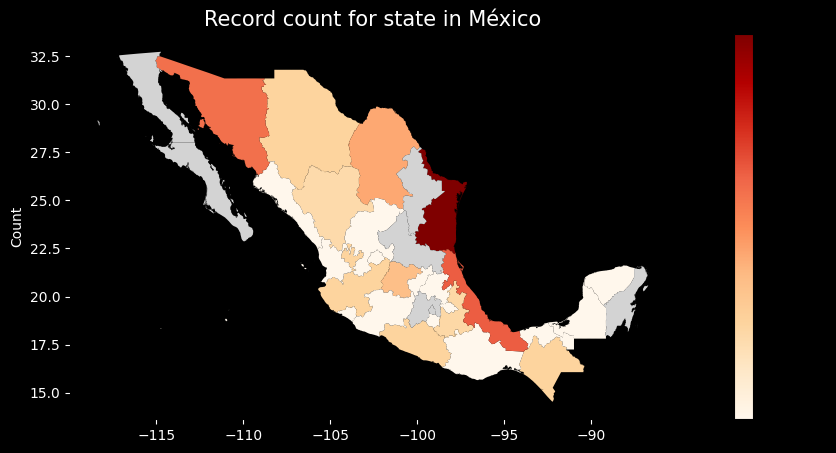

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
plt.title("Record count for state in México", fontsize=15, color='white')
ax.tick_params(colors='white')
mapa.plot(column='Count_Total',
          ax=ax,
          legend=True,
          cmap="OrRd",
          legend_kwds={'label': "Count"},
          missing_kwds={"color": "lightgrey", "label": "No data"})
ax.set_ylabel("Count", color='#FFFFFF')
plt.show()

In [58]:
#Some states from the DF are different from the GP Object, for example, they have unbreakable spaces. This line changes that.
#Algunos estados del DF son diferentes al objeto de GP, por ejemplo, tienen espacios irrompibles, esta linea cambia eso.
conteo_estados['State'] = conteo_estados['State'].str.replace('\xa0', ' ', regex=False)

In [59]:
map_dict = conteo_estados.set_index("State")["Count_Total"].to_dict()

In [60]:
map_dict

{'Tamaulipas': 26400,
 'Veracruz': 18878,
 'Sonora': 17816,
 'Coahuila': 14328,
 'Guanajuato': 12825,
 'Jalisco': 10560,
 'Nuevo León': 10560,
 'Baja California': 10560,
 'Chiapas': 10560,
 'Chihuahua': 10560,
 'D.F.': 10560,
 'Quintana Roo': 10560,
 'Guerrero': 10560,
 'Puebla': 10103,
 'Durango': 9804,
 'Tabasco': 5280,
 'Tlaxcala': 5280,
 'Sinaloa': 5280,
 'Yucatán': 5280,
 'San Luis Potosí': 5280,
 'Aguascalientes': 5280,
 'Morelos': 5280,
 'Querétaro': 5280,
 'Oaxaca': 5280,
 'Nayarit': 5280,
 'Michoacán': 5280,
 'Edo. México': 5280,
 'Hidalgo': 5280,
 'Colima': 5280,
 'Campeche': 5280,
 'Baja California Sur': 5280,
 'Zacatecas': 5280}

In [61]:
#This line erases the spaces at the start and end of each text.
#Esta linea borra los espacios al principio y final de cada texto.
conteo_estados['State'] = conteo_estados['State'].str.strip()
mapa['NAME_1'] = mapa['NAME_1'].str.strip()

In [62]:
#This line change all text to lowercase
#Esta linea cambia todo el texto a minuscula
conteo_estados['State'] = conteo_estados['State'].str.lower()
mapa['NAME_1'] = mapa['NAME_1'].str.lower()

In [63]:
#Both DF are equal now
#Ahora ambos DF son iguales
print(mapa['NAME_1'].unique())
print(conteo_estados['State'].unique())

['aguascalientes' 'baja california' 'baja california sur' 'campeche'
 'chiapas' 'chihuahua' 'coahuila' 'colima' 'distrito federal' 'durango'
 'guanajuato' 'guerrero' 'hidalgo' 'jalisco' 'méxico' 'michoacán'
 'morelos' 'nayarit' 'nuevo león' 'oaxaca' 'puebla' 'querétaro'
 'quintana roo' 'san luis potosí' 'sinaloa' 'sonora' 'tabasco'
 'tamaulipas' 'tlaxcala' 'veracruz' 'yucatán' 'zacatecas']
['tamaulipas' 'veracruz' 'sonora' 'coahuila' 'guanajuato' 'jalisco'
 'nuevo león' 'baja california' 'chiapas' 'chihuahua' 'd.f.'
 'quintana roo' 'guerrero' 'puebla' 'durango' 'tabasco' 'tlaxcala'
 'sinaloa' 'yucatán' 'san luis potosí' 'aguascalientes' 'morelos'
 'querétaro' 'oaxaca' 'nayarit' 'michoacán' 'edo. méxico' 'hidalgo'
 'colima' 'campeche' 'baja california sur' 'zacatecas']


In [64]:
#Just change the names of the next two states to match the states in the GP object.
#Solo cambiamos los nombres de los siguientes dos estados para hacer match con los estados en el objeto de GP.
conteo_estados.loc[10, "State"] = "distrito federal"

In [65]:
conteo_estados.loc[10]

,10
State,distrito federal
Count_Total,10560


In [66]:
conteo_estados.loc[26, 'State'] = 'méxico'

In [67]:
conteo_estados.loc[26]

,26
State,méxico
Count_Total,5280


In [68]:
#Now it should work.
#Ahora deberia funcionar.
mapa=mapa.merge(conteo_estados, left_on='NAME_1', right_on='State', how='left')

In [69]:
mapa.head(3)

Output hidden; open in https://colab.research.google.com to view.

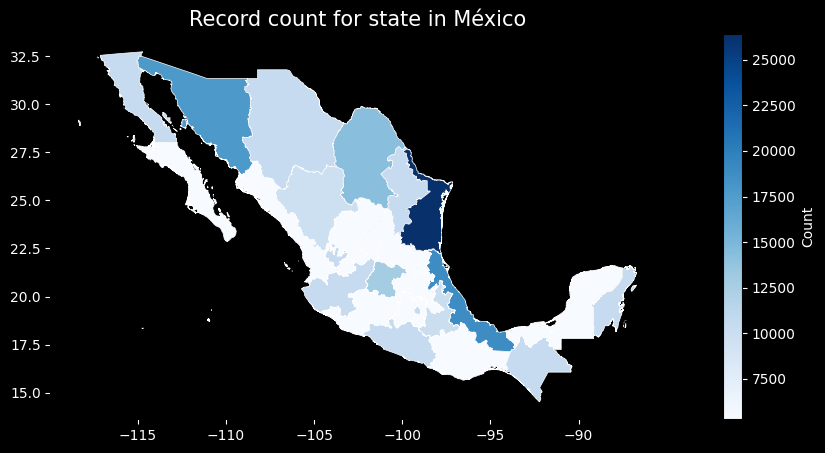

In [185]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
mapa.plot(
    column='Count_Total_y',
    ax=ax,
    legend=True,
    cmap="Blues",
    edgecolor="white",
    linewidth=0.5,
    legend_kwds={'label': "Count"},
    missing_kwds={"color": "lightgrey", "label": "No data"}
)
plt.title("Record count for state in México", fontsize=15, color='white')
ax.tick_params(axis='both', colors='white')
cax = fig.axes[1]
cax.tick_params(colors='white')
cax.yaxis.label.set_color('white')
plt.savefig('data_count_map.png', facecolor=fig.get_facecolor(), bbox_inches='tight', dpi=300)
plt.show()

In [71]:
df_tortillas

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,10.61
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
...,...,...,...,...,...,...,...
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40


In [72]:
df_tortillas.groupby(['State', 'Year', 'Month', 'Day'])['Price per kilogram'].mean()

State           Year  Month  Day
Aguascalientes  2007  1      10      7.865
                             12      7.865
                             15      7.865
                             16      7.865
                             17      7.865
                                     ...  
Zacatecas       2024  6      28     17.765
                      7      1      17.765
                             3      17.765
                             5      17.765
                             8      17.765
Name: Price per kilogram, Length: 84480, dtype: float64

In [73]:
df_tortillas['Date']=pd.to_datetime(df_tortillas['Year'].astype(str)+'-'+df_tortillas['Month'].astype(str)+'-'+df_tortillas['Day'].astype(str))

In [74]:
df_tortillas.groupby(['Year', 'Month']).min().Day

Year  Month
2007  1        10
      2         1
      3         1
      4         2
      5         2
               ..
2024  3         1
      4         1
      5         3
      6         3
      7         1
Name: Day, Length: 211, dtype: int64

In [75]:
df_tortillas

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90,2007-01-10
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,10.61,2007-01-10
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00,2007-01-10
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00,2007-01-10
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00,2007-01-10
...,...,...,...,...,...,...,...,...
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50,2024-07-08
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60,2024-07-08
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33,2024-07-08
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40,2024-07-08


In [76]:
#df_tortillas=df_tortillas.drop(['Year','Month','Day'],axis=1)

In [77]:
df_tortillas[df_tortillas['Date']=='2007-01-13']

,State,City,Year,Month,Day,Store type,Price per kilogram,Date


In [78]:
df_tortillas.groupby(['Date','State'])['Price per kilogram'].mean()

Date        State              
2007-01-10  Aguascalientes          7.865
            Baja California         8.050
            Baja California Sur     8.050
            Campeche                8.035
            Chiapas                 7.225
                                    ...  
2024-07-08  Tamaulipas             21.451
            Tlaxcala               15.150
            Veracruz               17.975
            Yucatán                20.630
            Zacatecas              17.765
Name: Price per kilogram, Length: 84480, dtype: float64

In [79]:
data_graph = df_tortillas.groupby('Date')['Price per kilogram'].mean().reset_index()
data_graph.columns=['Date', 'Average']

In [80]:
data_graph.head(3)

,Date,Average
0,2007-01-10,7.553592
1,2007-01-12,7.614854
2,2007-01-15,7.554466


In [81]:
data_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2640 non-null   datetime64[ns]
 1   Average  2640 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.4 KB


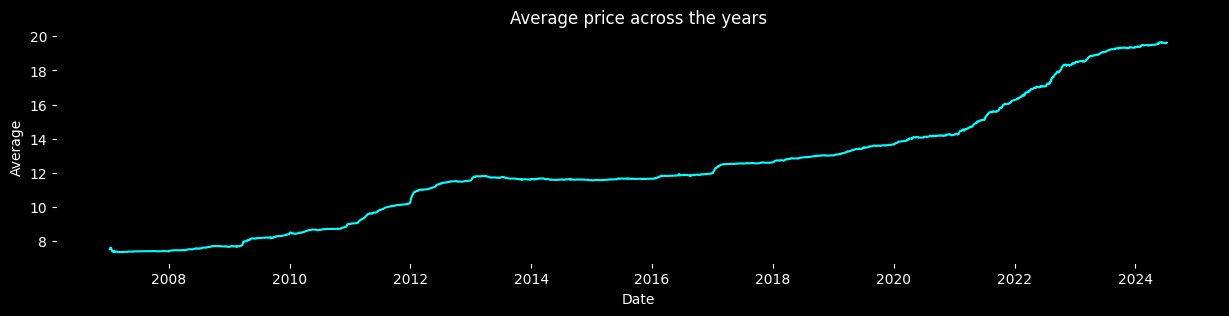

In [82]:
plt.figure(figsize=(15, 3), facecolor='black')  # Fondo negro para la figura
ax = plt.gca()
ax.set_facecolor('black')  # Fondo negro para los ejes
plt.plot(data_graph['Date'], data_graph['Average'], ls="solid", color="cyan")
plt.xlabel("Date", color='white')  # Etiquetas en blanco
plt.ylabel("Average", color='white')
plt.title("Average price across the years", color='white')  # Título en blanco
ax.tick_params(colors='white')  # Ticks en blanco
plt.savefig('average_price_across_years.png')
plt.show()

In [83]:
data_graph=df_tortillas.pivot_table(index='Date', values='Price per kilogram', columns='Store type', aggfunc='mean').round(2).reset_index()

In [84]:
data_graph.head(5)

Store type,Date,Big Retail Store,Mom and Pop Store
0,2007-01-10,5.70,9.30
1,2007-01-12,5.67,9.45
2,2007-01-15,5.58,9.42
3,2007-01-16,5.59,9.45
4,2007-01-17,5.61,9.48


In [85]:
data_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2640 non-null   datetime64[ns]
 1   Big Retail Store   2640 non-null   float64       
 2   Mom and Pop Store  2640 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 62.0 KB


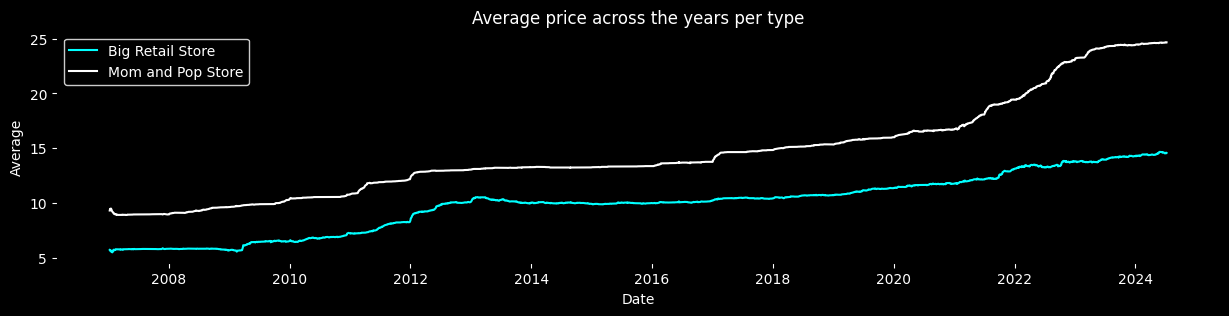

In [86]:
plt.figure(figsize=(15, 3), facecolor='black')  # Fondo negro para la figura
ax = plt.gca()
ax.set_facecolor('black')  # Fondo negro para los ejes
plt.plot(data_graph['Date'], data_graph['Big Retail Store'], ls="solid", color="cyan", label='Big Retail Store')
plt.plot(data_graph['Date'], data_graph['Mom and Pop Store'], ls="solid", color="white", label='Mom and Pop Store')
plt.xlabel("Date", color='white')  # Etiquetas en blanco
plt.ylabel("Average", color='white')
plt.title("Average price across the years per type", color='white')  # Título en blanco
ax.tick_params(colors='white')  # Ticks en blanco
plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.savefig('average_price_across_years_per_type.png')
plt.show()

In [87]:
df_tortillas.groupby(['Date','State','Store type'])['Price per kilogram'].mean()

Date        State                Store type       
2007-01-10  Aguascalientes       Big Retail Store      5.830000
                                 Mom and Pop Store     9.900000
            Baja California      Big Retail Store      5.795000
                                 Mom and Pop Store    10.305000
            Baja California Sur  Big Retail Store      6.100000
                                                        ...    
2024-07-08  Veracruz             Mom and Pop Store    22.473333
            Yucatán              Big Retail Store     13.400000
                                 Mom and Pop Store    27.860000
            Zacatecas            Big Retail Store     13.530000
                                 Mom and Pop Store    22.000000
Name: Price per kilogram, Length: 168960, dtype: float64

In [88]:
df_tortillas.head(1)

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9,2007-01-10


In [89]:
dftortillas=df_tortillas.groupby(['Date','State','Store type'])['Price per kilogram'].mean().round(2).reset_index()

In [90]:
dftortillas.head(3)

,Date,State,Store type,Price per kilogram
0,2007-01-10,Aguascalientes,Big Retail Store,5.83
1,2007-01-10,Aguascalientes,Mom and Pop Store,9.90
2,2007-01-10,Baja California,Big Retail Store,5.80


In [91]:
df_tortillas.head(3)

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90,2007-01-10
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,10.61,2007-01-10
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00,2007-01-10


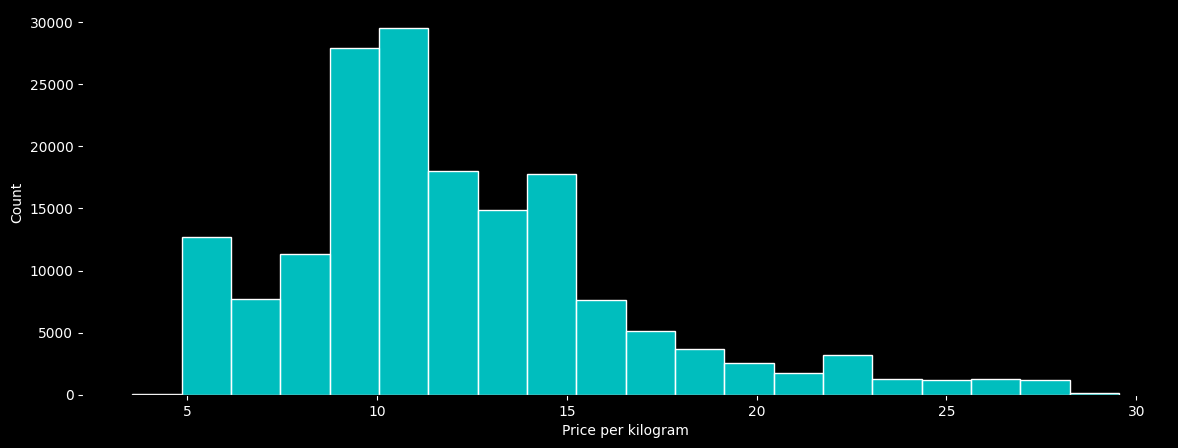

In [92]:
#Let's see the distribution.
#Veamos la distribucion.
plt.figure(figsize=(14,5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
sns.histplot(dftortillas['Price per kilogram'], bins=20, color='cyan', edgecolor='white')
plt.savefig('price_distribution_2.png')
plt.show()

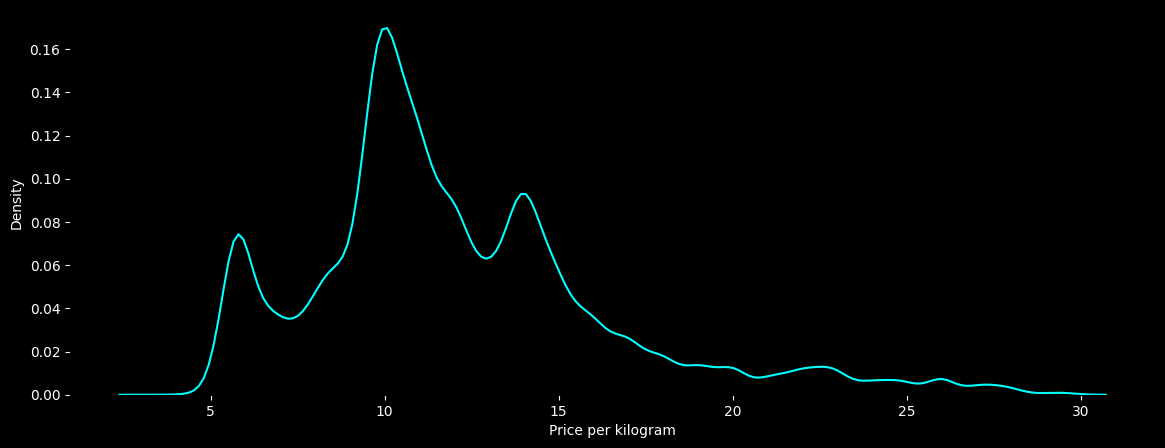

In [93]:
#Let's see the distribution.
#Veamos la distribucion.
plt.figure(figsize=(14,5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
sns.kdeplot(dftortillas['Price per kilogram'], color='cyan')
plt.savefig('price_distribution_kde_2.png')
plt.show()

<ipython-input-94-371050cd1f3a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='Price per kilogram', data=dftortillas, palette=Rp, whiskerprops={'color': 'white'}, flierprops=dict(
<ipython-input-94-371050cd1f3a>:4: UserWarning: 
The palette list has fewer values (12) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='State', y='Price per kilogram', data=dftortillas, palette=Rp, whiskerprops={'color': 'white'}, flierprops=dict(


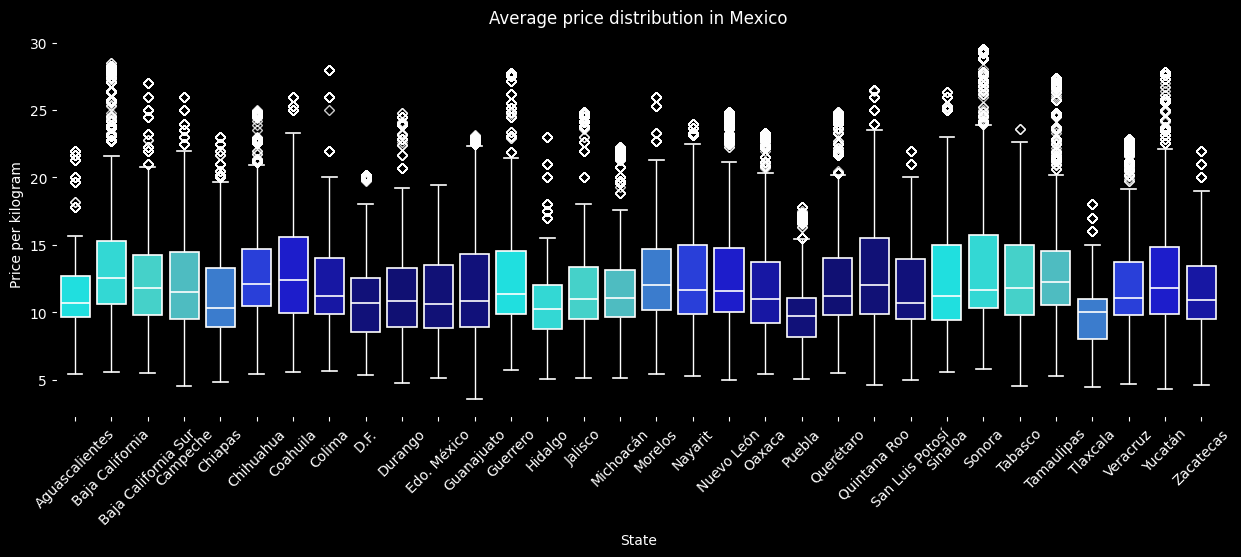

In [94]:
plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.boxplot(x='State', y='Price per kilogram', data=dftortillas, palette=Rp, whiskerprops={'color': 'white'}, flierprops=dict(
                      markeredgecolor='white',
                      marker='D',
                      markersize=5,
                      alpha=0.8
                  ),
                  boxprops=dict(edgecolor='white', linewidth=1.2),
                  capprops=dict(color='white', linewidth=1.2),
                  medianprops=dict(color='white', linewidth=1.2))
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.xlabel("State", color='white')
plt.ylabel("Price per kilogram", color='white')
plt.title("Average price distribution in Mexico", color='white')
ax.tick_params(colors='white')
plt.savefig('price_distribution_boxplot.png')
plt.show()

In [95]:
dftortillas['Price per kilogram'].nunique()

1661

In [96]:
dftortillas[dftortillas['Price per kilogram'].isna()]

,Date,State,Store type,Price per kilogram


In [97]:
data_graph=dftortillas

In [98]:
data_graph.head(5)

,Date,State,Store type,Price per kilogram
0,2007-01-10,Aguascalientes,Big Retail Store,5.83
1,2007-01-10,Aguascalientes,Mom and Pop Store,9.90
2,2007-01-10,Baja California,Big Retail Store,5.80
3,2007-01-10,Baja California,Mom and Pop Store,10.30
4,2007-01-10,Baja California Sur,Big Retail Store,6.10


In [99]:
data_graph['Year']=data_graph['Date'].dt.strftime('%Y')

In [100]:
data_graph.head(5)

,Date,State,Store type,Price per kilogram,Year
0,2007-01-10,Aguascalientes,Big Retail Store,5.83,2007
1,2007-01-10,Aguascalientes,Mom and Pop Store,9.90,2007
2,2007-01-10,Baja California,Big Retail Store,5.80,2007
3,2007-01-10,Baja California,Mom and Pop Store,10.30,2007
4,2007-01-10,Baja California Sur,Big Retail Store,6.10,2007


In [101]:
data_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168960 entries, 0 to 168959
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                168960 non-null  datetime64[ns]
 1   State               168960 non-null  object        
 2   Store type          168960 non-null  object        
 3   Price per kilogram  168960 non-null  float64       
 4   Year                168960 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 6.4+ MB


In [102]:
years=data_graph.groupby('Year').agg({'Price per kilogram':'count'})

In [103]:
years.max()

,0
Price per kilogram,10176


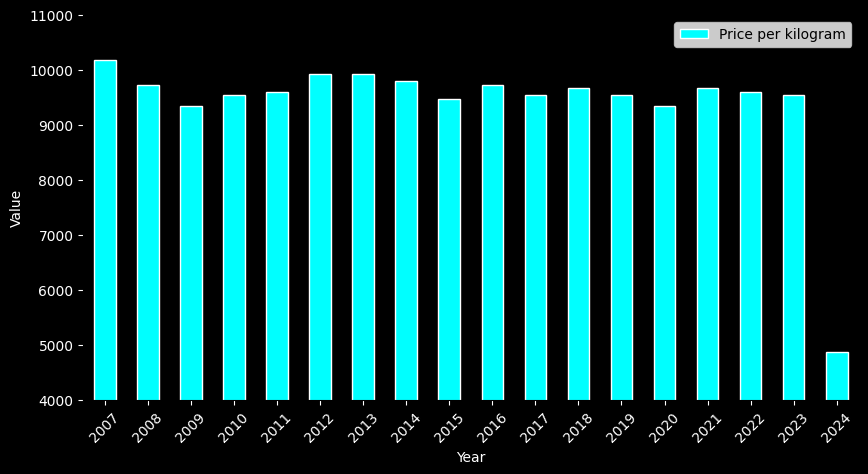

In [104]:
plt.figure(figsize=(10, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
years.plot.bar(ax=ax, ylim=(4000, 11000), color='cyan', edgecolor='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.xlabel("Year", color='white')
plt.ylabel("Value", color='white')
ax.tick_params(colors='white')
plt.savefig('count_data_per_year.png')
plt.show()

In [105]:
max_prices = data_graph.groupby('Year')['Price per kilogram'].max().reset_index()

In [106]:
max_prices['Year'].unique()

array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'], dtype=object)

In [107]:
max_prices['Year'] = max_prices['Year'].astype(int)

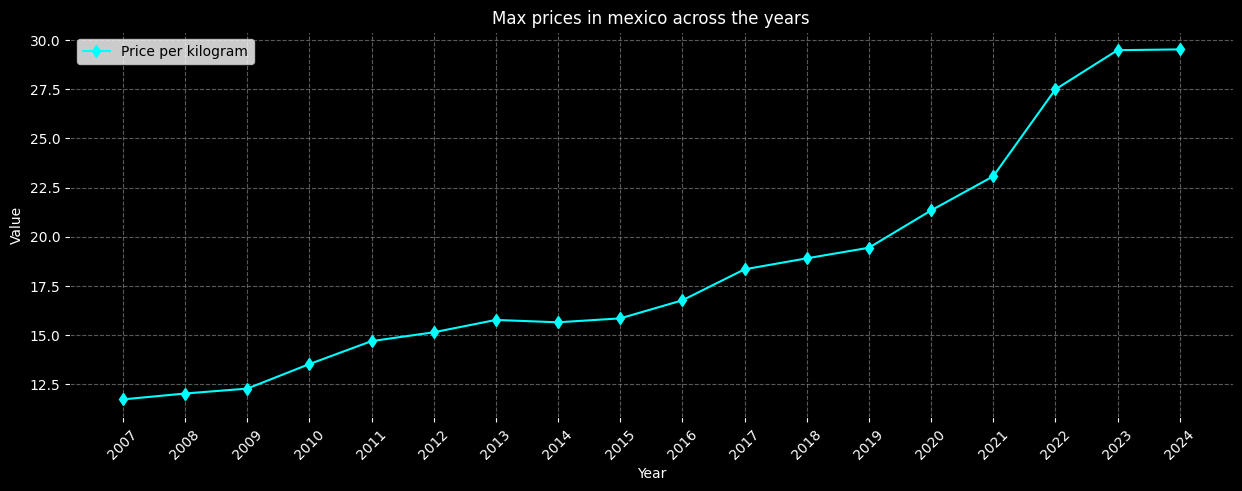

In [108]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor='black')
ax.set_facecolor('black')
max_prices.plot(x='Year', marker='d', color='cyan', ax=ax)
ax.grid(True, linestyle='--', color='gray', alpha=0.7)
ax.set_xticks(max_prices['Year'])
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.xlabel("Year", color='white')
plt.ylabel("Value", color='white')
plt.title("Max prices in mexico across the years", color='white')
ax.tick_params(colors='white')
plt.savefig('max_prices_per_year_1.png')
plt.show()

In [109]:
average_price=data_graph.groupby(['State','Year'])['Price per kilogram'].mean().round(2).reset_index()

In [110]:
'''
#Realizar un dataframe con promedios agrupados por estado y año
average_price = data_graph.groupby(['State', 'Year'])['Price per kilogram'].mean().reset_index()
#Lista con los estados existentes del dataframe
states = average_price['State'].unique()
#Establecer los parametros para dibujar el subplot mas adelante
num_rows = 8
num_cols = 4
#Figura base para dibujar los subplots y titulo
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
fig.suptitle('Average price per year', fontsize=16)

for i, state in enumerate(states):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    state_data = average_price[average_price['State'] == state]
    ax.plot(state_data['Year'], state_data['Price per kilogram'], marker='d', color='green')
    ax.set_title(state, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Price')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(state_data['Year'])
    ax.tick_params(axis='x', rotation=45)
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
fig.savefig('Average_Prices_per_State.png')'''

"\n#Realizar un dataframe con promedios agrupados por estado y año\naverage_price = data_graph.groupby(['State', 'Year'])['Price per kilogram'].mean().reset_index()\n#Lista con los estados existentes del dataframe\nstates = average_price['State'].unique()\n#Establecer los parametros para dibujar el subplot mas adelante\nnum_rows = 8\nnum_cols = 4\n#Figura base para dibujar los subplots y titulo\nfig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))\nfig.suptitle('Average price per year', fontsize=16)\n\nfor i, state in enumerate(states):\n    row = i // num_cols\n    col = i % num_cols\n    ax = axes[row, col]\n    state_data = average_price[average_price['State'] == state]\n    ax.plot(state_data['Year'], state_data['Price per kilogram'], marker='d', color='green')\n    ax.set_title(state, fontsize=10)\n    ax.set_xlabel('Year')\n    ax.set_ylabel('Average Price')\n    ax.grid(True, linestyle='--', alpha=0.5)\n    ax.set_xticks(state_data['Year'])\n    ax.tick_params(axis='x'

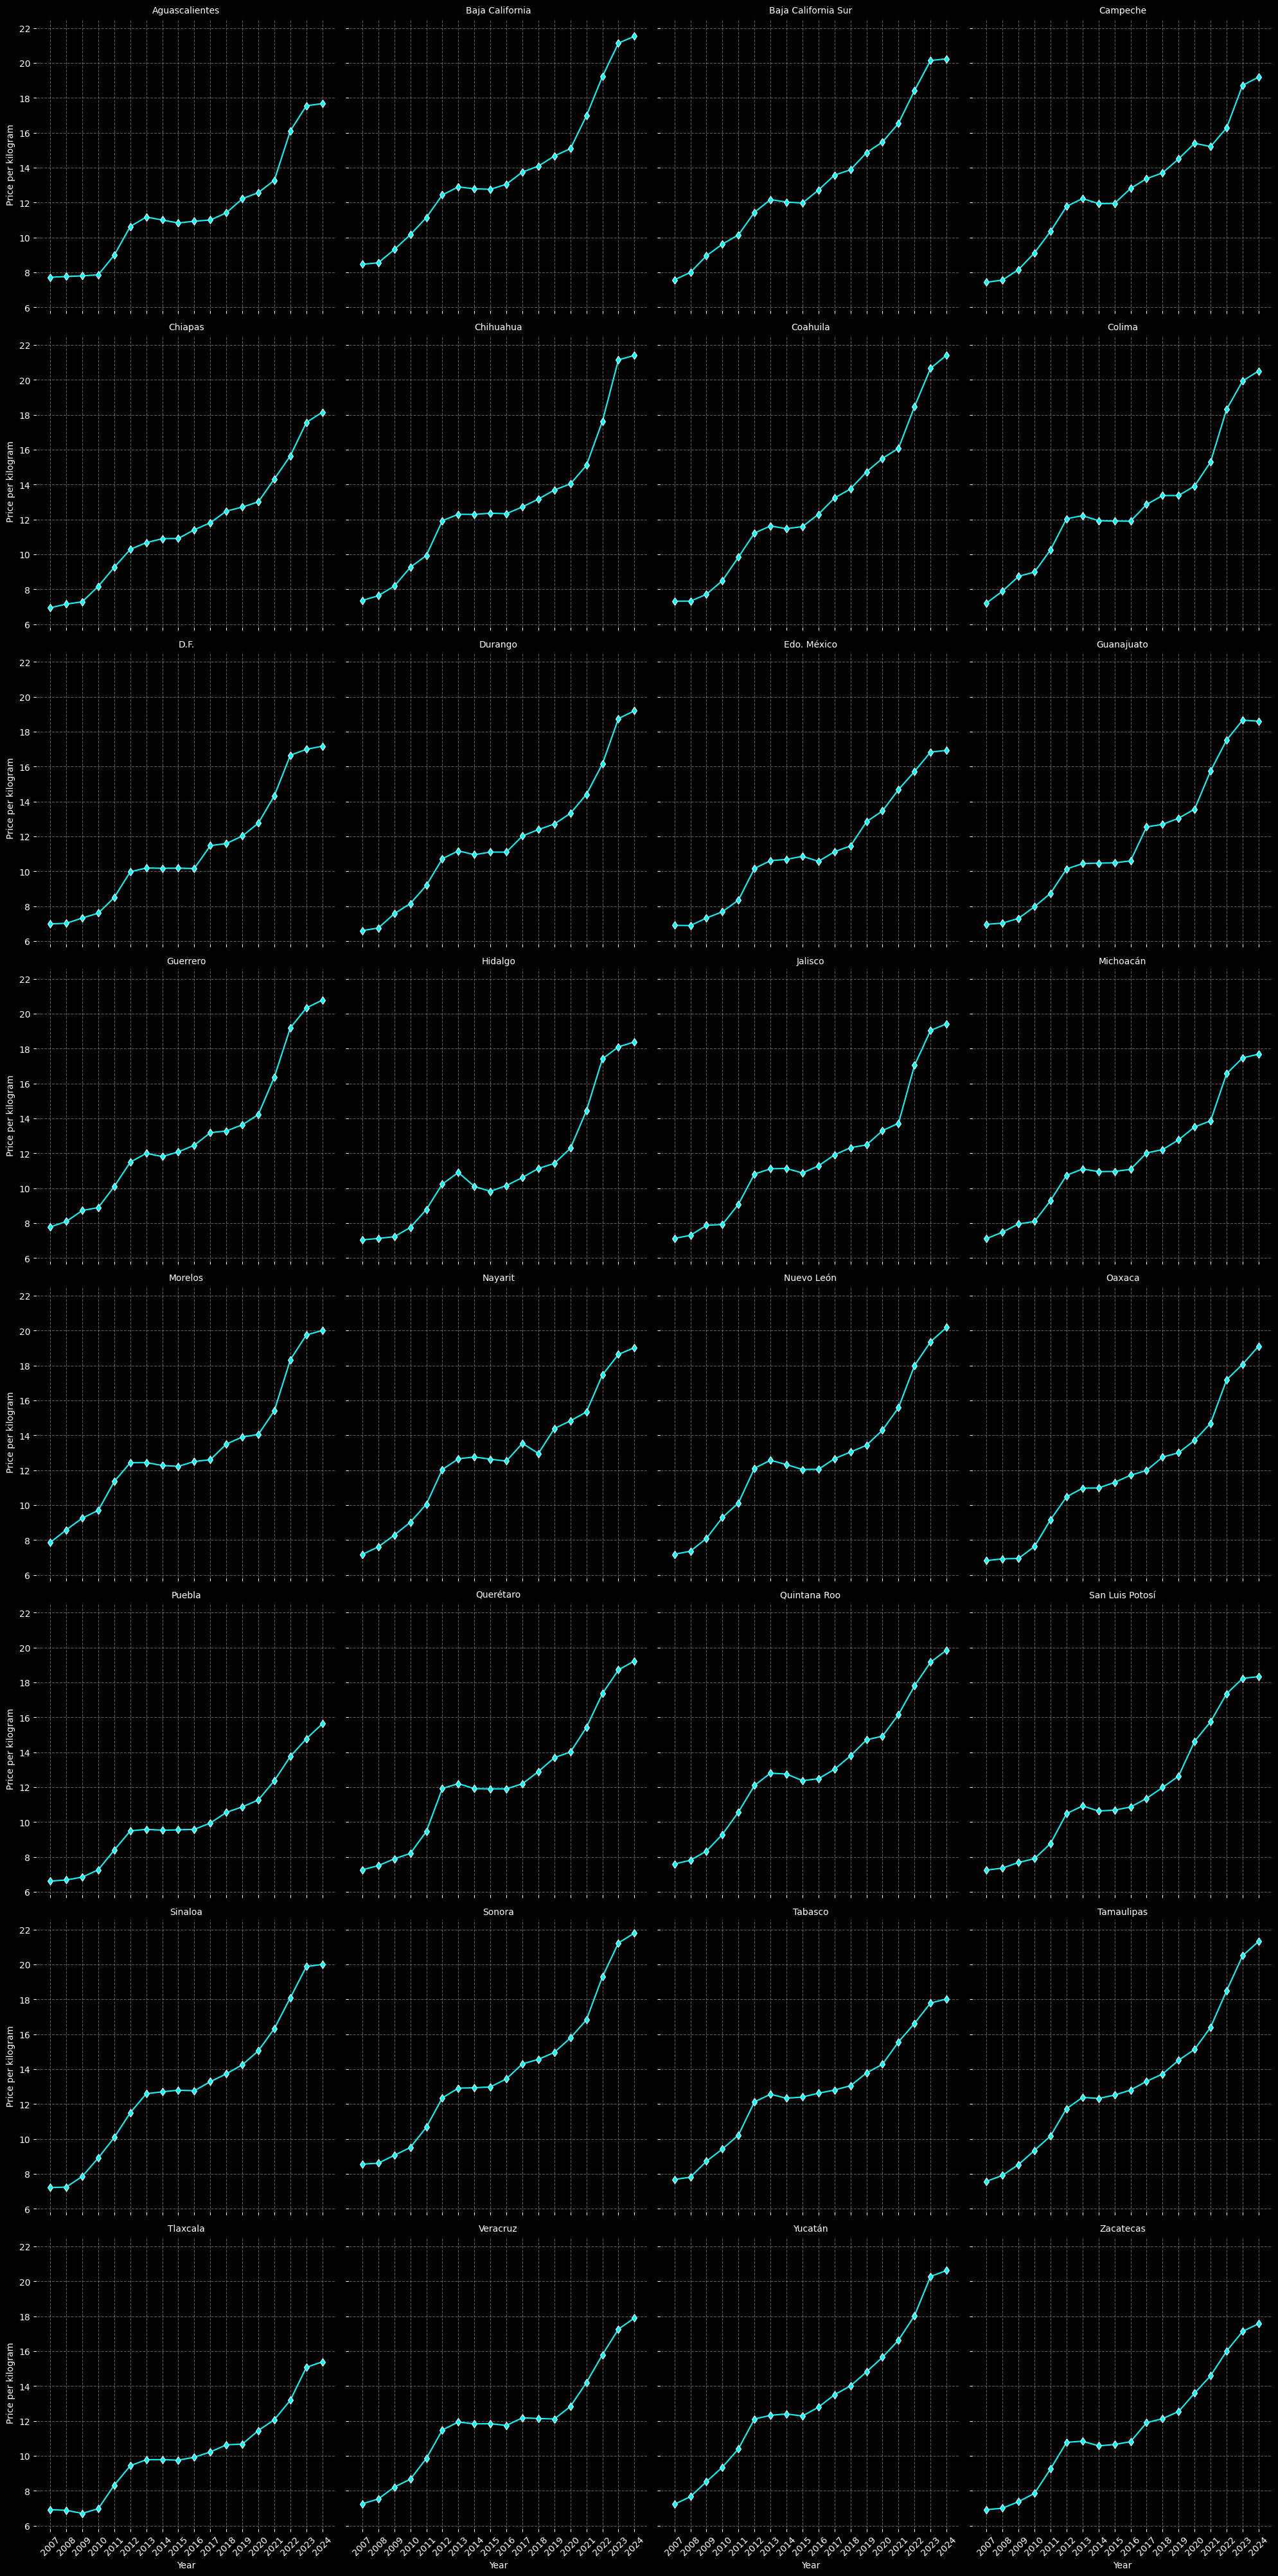

In [111]:
sg = sns.relplot(kind='line', x="Year", y="Price per kilogram", col="State",
                 data=average_price, col_wrap=4, marker='d', color='cyan')
sg.set_titles(col_template="{col_name}")

for ax in sg.axes.flat:
    ax.set_facecolor('black')
    ax.grid(True, linestyle='--', color='gray', alpha=0.7)
    ax.tick_params(axis='x', rotation=45, colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('white')

sg.fig.set_facecolor('black')
plt.savefig('Average_Prices_per_State_2.png')
plt.show()

In [112]:
dftortillas.head()

,Date,State,Store type,Price per kilogram,Year
0,2007-01-10,Aguascalientes,Big Retail Store,5.83,2007
1,2007-01-10,Aguascalientes,Mom and Pop Store,9.90,2007
2,2007-01-10,Baja California,Big Retail Store,5.80,2007
3,2007-01-10,Baja California,Mom and Pop Store,10.30,2007
4,2007-01-10,Baja California Sur,Big Retail Store,6.10,2007


In [113]:
data_graph['Year'] = pd.to_numeric(dftortillas['Year'], errors='coerce')

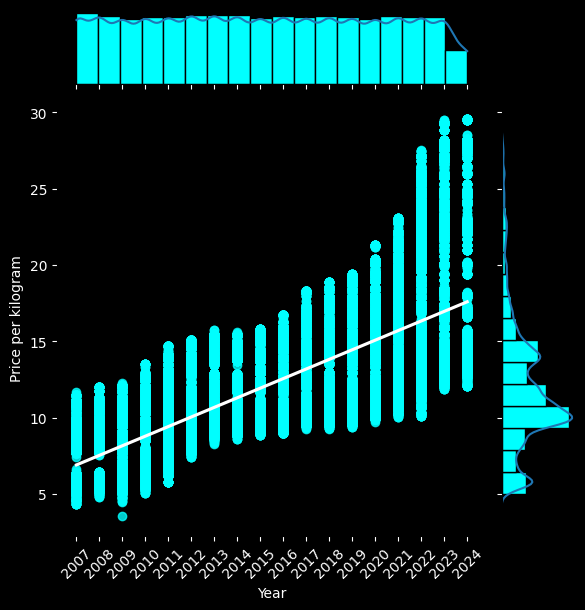

In [114]:
gp = sns.jointplot(data=data_graph, x="Year", y="Price per kilogram", kind="reg",
                   marginal_kws={"bins": 18}, joint_kws={"color": "cyan", "line_kws": {"color": "white"}})
gp.fig.set_facecolor('black')
gp.ax_joint.set_facecolor('black')
gp.ax_marg_x.set_facecolor('black')
gp.ax_marg_y.set_facecolor('black')

for patch in gp.ax_marg_x.patches:
    patch.set_facecolor('cyan')

for patch in gp.ax_marg_y.patches:
    patch.set_facecolor('cyan')

gp.ax_joint.set_xticks(range(2007, 2025))
gp.ax_joint.set_xticklabels(range(2007, 2025), rotation=45, color='white')
gp.ax_joint.tick_params(colors='white')
gp.ax_joint.xaxis.label.set_color('white')
gp.ax_joint.yaxis.label.set_color('white')
gp.ax_marg_x.tick_params(colors='white')
gp.ax_marg_y.tick_params(colors='white')
plt.savefig('jointplot.png')
plt.show()

<ipython-input-115-5f62336cfd38>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Price per kilogram', data=data_graph, palette=Rp, whiskerprops={'color': 'white'}, flierprops=dict(
<ipython-input-115-5f62336cfd38>:4: UserWarning: 
The palette list has fewer values (12) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Year', y='Price per kilogram', data=data_graph, palette=Rp, whiskerprops={'color': 'white'}, flierprops=dict(


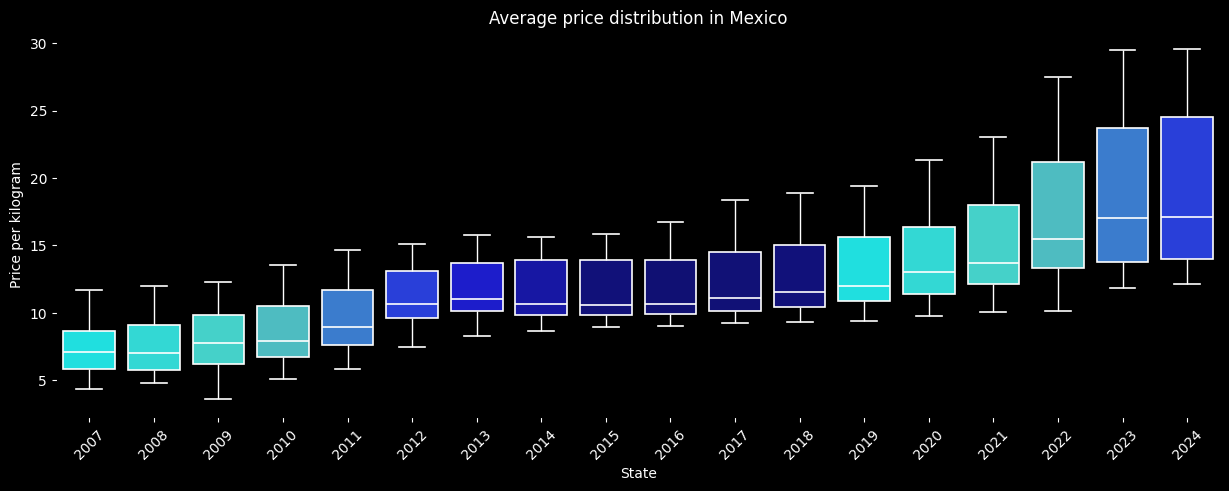

In [115]:
plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.boxplot(x='Year', y='Price per kilogram', data=data_graph, palette=Rp, whiskerprops={'color': 'white'}, flierprops=dict(
                      markeredgecolor='white',
                      marker='D',
                      markersize=5,
                      alpha=0.8
                  ),
                  boxprops=dict(edgecolor='white', linewidth=1.2),
                  capprops=dict(color='white', linewidth=1.2),
                  medianprops=dict(color='white', linewidth=1.2))
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.xlabel("State", color='white')
plt.ylabel("Price per kilogram", color='white')
plt.title("Average price distribution in Mexico", color='white')
ax.tick_params(colors='white')
plt.savefig('price_distribution_boxplot_per_year.png')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


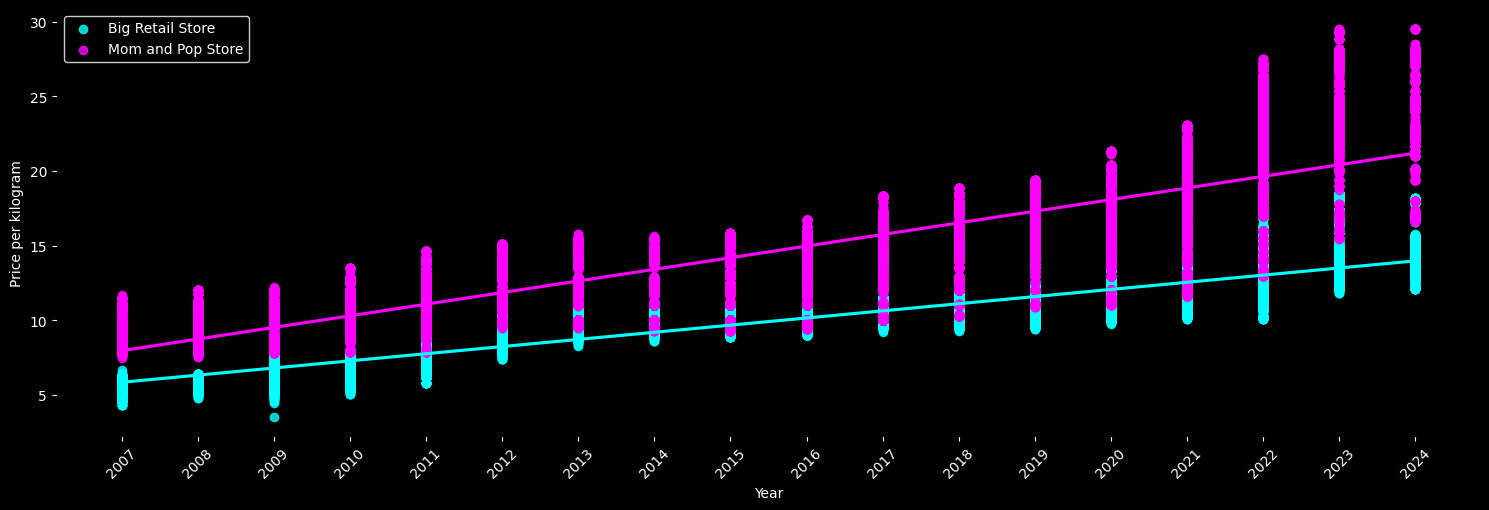

In [116]:
gp = sns.lmplot(x="Year", y="Price per kilogram", hue="Store type", data=dftortillas,
                palette=['cyan', 'magenta'],
                height=5, aspect=3, legend_out=False)
gp.fig.set_facecolor('black')

for ax in gp.axes.flat:
    ax.set_facecolor('black')
    ax.set_xticks(range(2007, 2025))
    ax.set_xticklabels(range(2007, 2025), rotation=45, color='white')
    ax.tick_params(colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('white')

plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.savefig('price_per_year_per_type_1.png')
plt.show()

In [117]:
df_tortillas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284394 entries, 0 to 284393
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               284394 non-null  object        
 1   City                284394 non-null  object        
 2   Year                284394 non-null  int64         
 3   Month               284394 non-null  int64         
 4   Day                 284394 non-null  int64         
 5   Store type          284394 non-null  object        
 6   Price per kilogram  284394 non-null  float64       
 7   Date                284394 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 17.4+ MB


In [118]:
df_tortillas.drop('Date', axis=1, inplace=True)

In [119]:
df_tortillas[df_tortillas['Price per kilogram']==0]

,State,City,Year,Month,Day,Store type,Price per kilogram
45191,Guanajuato,Irapuato,2009,9,9,Big Retail Store,0.0


In [120]:
df_tortillas[(df_tortillas['City']=='Irapuato') & (df_tortillas['Year']==2009) & (df_tortillas['Month']==9) & (df_tortillas['Store type']=='Big Retail Store')]

,State,City,Year,Month,Day,Store type,Price per kilogram
45038,Guanajuato,Irapuato,2009,9,2,Big Retail Store,5.67
45089,Guanajuato,Irapuato,2009,9,4,Big Retail Store,5.67
45140,Guanajuato,Irapuato,2009,9,7,Big Retail Store,5.63
45191,Guanajuato,Irapuato,2009,9,9,Big Retail Store,0.00
45242,Guanajuato,Irapuato,2009,9,11,Big Retail Store,5.67
45293,Guanajuato,Irapuato,2009,9,14,Big Retail Store,5.67
45344,Guanajuato,Irapuato,2009,9,18,Big Retail Store,5.67
45395,Guanajuato,Irapuato,2009,9,21,Big Retail Store,5.67
45446,Guanajuato,Irapuato,2009,9,23,Big Retail Store,5.67
45497,Guanajuato,Irapuato,2009,9,25,Big Retail Store,5.67


In [121]:
df_tortillas['Price per kilogram'].replace(0, 5.63, inplace=True)

<ipython-input-121-019725582345>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tortillas['Price per kilogram'].replace(0, 5.63, inplace=True)


In [122]:
df_tortillas[(df_tortillas['City']=='Irapuato') & (df_tortillas['Year']==2009) & (df_tortillas['Month']==9) & (df_tortillas['Store type']=='Big Retail Store')]

,State,City,Year,Month,Day,Store type,Price per kilogram
45038,Guanajuato,Irapuato,2009,9,2,Big Retail Store,5.67
45089,Guanajuato,Irapuato,2009,9,4,Big Retail Store,5.67
45140,Guanajuato,Irapuato,2009,9,7,Big Retail Store,5.63
45191,Guanajuato,Irapuato,2009,9,9,Big Retail Store,5.63
45242,Guanajuato,Irapuato,2009,9,11,Big Retail Store,5.67
45293,Guanajuato,Irapuato,2009,9,14,Big Retail Store,5.67
45344,Guanajuato,Irapuato,2009,9,18,Big Retail Store,5.67
45395,Guanajuato,Irapuato,2009,9,21,Big Retail Store,5.67
45446,Guanajuato,Irapuato,2009,9,23,Big Retail Store,5.67
45497,Guanajuato,Irapuato,2009,9,25,Big Retail Store,5.67


In [123]:
df_tortillas.describe()

,Year,Month,Day,Price per kilogram
count,284394.000000,284394.000000,284394.000000,284394.000000
mean,2015.252773,6.353024,15.923645,12.226337
std,5.017507,3.418542,8.751436,4.473591
min,2007.000000,1.000000,1.000000,3.870000
25%,2011.000000,3.000000,8.000000,9.630000
50%,2015.000000,6.000000,16.000000,11.250000
75%,2020.000000,9.000000,24.000000,14.130000
max,2024.000000,12.000000,31.000000,31.000000


In [124]:
df_tortillas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284394 entries, 0 to 284393
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               284394 non-null  object 
 1   City                284394 non-null  object 
 2   Year                284394 non-null  int64  
 3   Month               284394 non-null  int64  
 4   Day                 284394 non-null  int64  
 5   Store type          284394 non-null  object 
 6   Price per kilogram  284394 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 15.2+ MB


In [125]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00


In [158]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV, learning_curve, train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor, plot_importance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [127]:
df_final=df_tortillas.copy()

In [128]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284394 entries, 0 to 284393
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               284394 non-null  object 
 1   City                284394 non-null  object 
 2   Year                284394 non-null  int64  
 3   Month               284394 non-null  int64  
 4   Day                 284394 non-null  int64  
 5   Store type          284394 non-null  object 
 6   Price per kilogram  284394 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 15.2+ MB


In [129]:
def targetencoder(categorical_data):
  encoder = TargetEncoder()
  df_final[categorical_data]=encoder.fit_transform(df_final[categorical_data], df_final['Price per kilogram'])

In [130]:
variable=['State','City', 'Store type']
for i in variable:
  targetencoder(i)

In [131]:
print(df_tortillas['State'].nunique())
print(df_tortillas['City'].nunique())
print(df_tortillas['Store type'].nunique())
print(df_final['State'].nunique())
print(df_final['City'].nunique())
print(df_final['Store type'].nunique())

32
56
2
32
56
2


In [132]:
df_final.head(3)

,State,City,Year,Month,Day,Store type,Price per kilogram
0,11.284947,11.284947,2007,1,10,14.519819,9.90
1,13.539625,14.205748,2007,1,10,14.519819,10.61
2,13.539625,12.873502,2007,1,10,14.519819,10.00


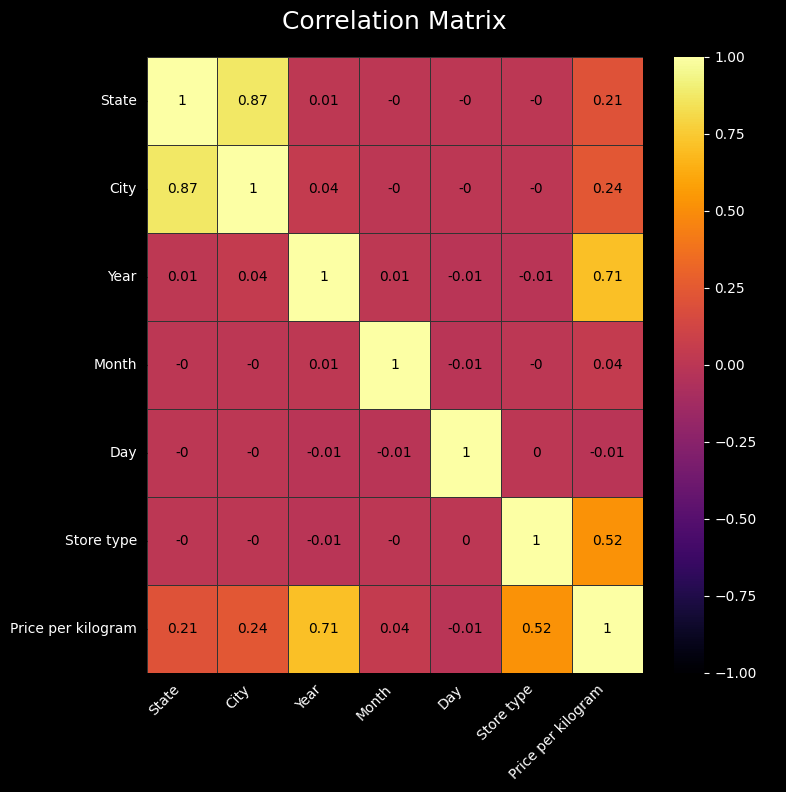

In [133]:
plt.figure(figsize=(8, 8), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
heatmap = sns.heatmap(
    df_final.corr().round(2),
    annot=True,
    cmap='inferno',
    annot_kws={'color': 'black', 'size': 10},
    linewidths=0.5,
    linecolor='#333333',
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Correlation Scale'}
)
plt.title('Correlation Matrix', color='white', fontsize=18, pad=20)
plt.xticks(color='white', rotation=45, ha='right')
plt.yticks(color='white', rotation=0)
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='white')
cbar.outline.set_edgecolor('white')
plt.setp(cbar.ax.get_yticklabels(), color='white')
plt.savefig('correlation_matrix_dark.png')
plt.show()

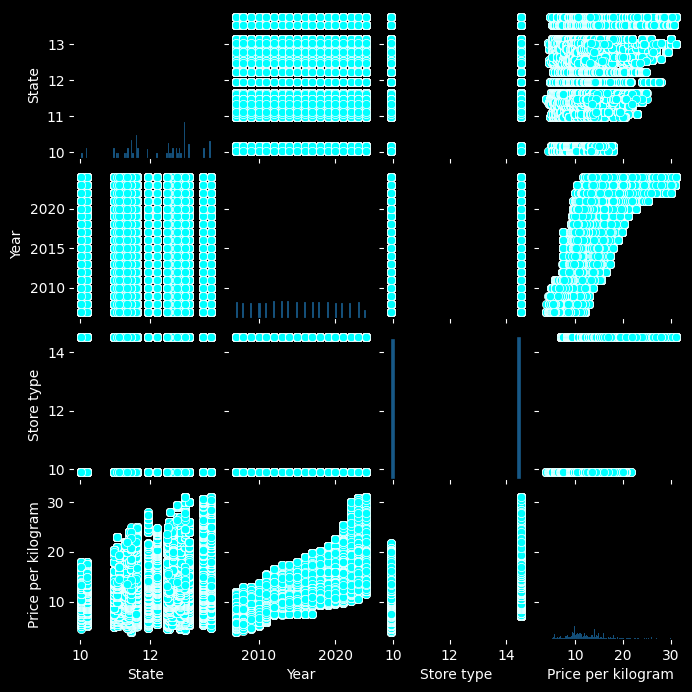

In [134]:
cols = ["State", "Year", "Store type", "Price per kilogram"]

gp = sns.pairplot(df_final[cols], height=1.75, plot_kws={'color': 'cyan'})
gp.fig.patch.set_facecolor('black')

for ax in gp.axes.flat:
    ax.set_facecolor('black')
    ax.tick_params(colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('white')

plt.savefig('pairplot.png')
plt.show()

In [135]:
df_final.columns

Index(['State', 'City', 'Year', 'Month', 'Day', 'Store type',
       'Price per kilogram'],
      dtype='object')

In [136]:
x=df_final.drop(['Price per kilogram'],axis=1)
y=df_final['Price per kilogram']

In [137]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=True, random_state=42)

In [138]:
xgb_model=XGBRegressor(objective="reg:squarederror",
        random_state=42,
        eval_metric="rmse",
        n_estimators=500,)

In [139]:
xgb_model.set_params(nthread=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None, nthread=1,
             num_parallel_tree=None, ...)

In [140]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [141]:
param_grid_xgb = {
    'learning_rate': [0.005, 0.01, 0.05, 0.1],  # Taza de aprendizaje
    'max_depth': [3, 5, 6],                     # Profundidades de los arboles
    'subsample': [0.6, 0.8, 1.0],               # Datos con los que se alimentaran cada arbol
    'colsample_bytree': [0.6, 0.8, 1.0],        # Fracciones de columnas a probar
    'gamma': [0, 0.1, 0.2],                     # Penalizacion a la creacion de arboles
    'reg_alpha': [0, 0.5, 1],                   # Penalizacion a la suma de los valores absolutos de los pesos
    'reg_lambda': [0, 0.5, 1],                  # Penalizacion a la suma de los valores cuadrados de los pesos
}

In [142]:
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=25,
    cv=cv,  # Validación cruzada
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2)

In [143]:
#random_search_xgb.fit(x_train, y_train)

In [144]:
#best_params = random_search_xgb.best_params_
#print(f"Best parámeters: {best_params}")
#print(f"Best RMSE (CV): {-random_search_xgb.best_score_:.2f}")
#Best parámeters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
#Best RMSE (CV): 0.34

In [145]:
xgb_model = XGBRegressor(
    subsample= 0.8,
    reg_lambda= 1,
    reg_alpha= 1,
    max_depth= 5,
    learning_rate= 0.05,
    gamma= 0.2,
    colsample_bytree= 0.8,
    objective="reg:squarederror",
    eval_metric="rmse",
    early_stopping_rounds=5,
    n_estimators=2000
)

In [146]:
xgb_model.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    verbose=50
)

[0]	validation_0-rmse:4.38877	validation_1-rmse:4.41720
[50]	validation_0-rmse:1.29972	validation_1-rmse:1.31042
[100]	validation_0-rmse:0.76867	validation_1-rmse:0.77414
[150]	validation_0-rmse:0.66680	validation_1-rmse:0.67155
[200]	validation_0-rmse:0.62249	validation_1-rmse:0.62862
[250]	validation_0-rmse:0.60347	validation_1-rmse:0.60991
[300]	validation_0-rmse:0.58516	validation_1-rmse:0.59202
[350]	validation_0-rmse:0.57061	validation_1-rmse:0.57783
[400]	validation_0-rmse:0.55805	validation_1-rmse:0.56568
[450]	validation_0-rmse:0.54553	validation_1-rmse:0.55322
[500]	validation_0-rmse:0.53435	validation_1-rmse:0.54207
[550]	validation_0-rmse:0.52343	validation_1-rmse:0.53151
[600]	validation_0-rmse:0.51563	validation_1-rmse:0.52398
[650]	validation_0-rmse:0.50815	validation_1-rmse:0.51659
[700]	validation_0-rmse:0.49880	validation_1-rmse:0.50755
[750]	validation_0-rmse:0.49385	validation_1-rmse:0.50258
[800]	validation_0-rmse:0.48821	validation_1-rmse:0.49709
[850]	validation_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [147]:
y_pred = xgb_model.predict(x_test)
y_true = y_test

In [148]:
print("XGB final Metrics:")
print(f"MAE: ${mean_absolute_error(y_true, y_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
print(f"R²: {r2_score(y_true, y_pred):.2%}")
print(f"Mean Error: {np.mean(np.abs(y_true - y_pred)/y_true):.2%}")

XGB final Metrics:
MAE: $0.34
RMSE: $0.47
R²: 98.89%
Mean Error: 2.95%


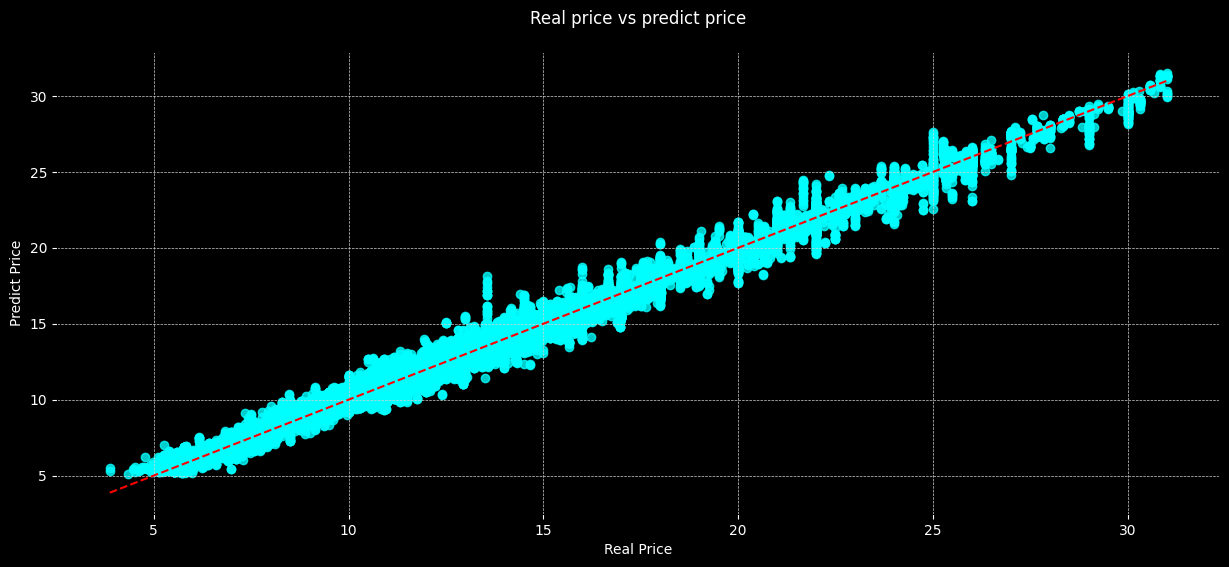

In [149]:
plt.figure(figsize=(15, 6), facecolor='black')
plt.gca().set_facecolor('black')
plt.scatter(y_true, y_pred, alpha=0.8, color='cyan')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--")
plt.xlabel("Real Price", color='white')
plt.ylabel("Predict Price", color='white')
plt.title("Real price vs predict price", color='white', pad=20)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
plt.savefig('xgb_model_predictions.png')
plt.show()

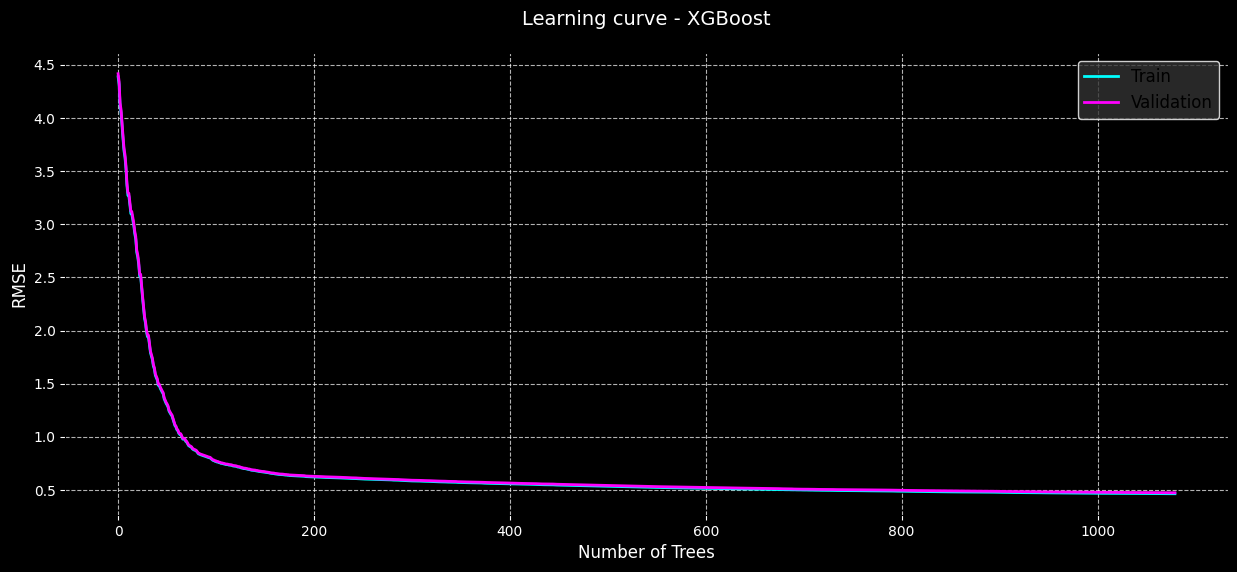

In [150]:
results = xgb_model.evals_result()
plt.figure(figsize=(15, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.plot(results["validation_0"]["rmse"], label="Train", color='cyan', linewidth=2)
plt.plot(results["validation_1"]["rmse"], label="Validation", color='magenta', linewidth=2)
plt.xlabel("Number of Trees", color='white', fontsize=12)
plt.ylabel("RMSE", color='white', fontsize=12)
plt.title("Learning curve - XGBoost", color='white', fontsize=14, pad=20)
plt.tick_params(axis='both', colors='white')
plt.legend(facecolor='#333333', edgecolor='white', fontsize=12)
plt.grid(True, color='white', linestyle='--', alpha=0.7)
plt.savefig('learning_curve_final_model.png')
plt.show()

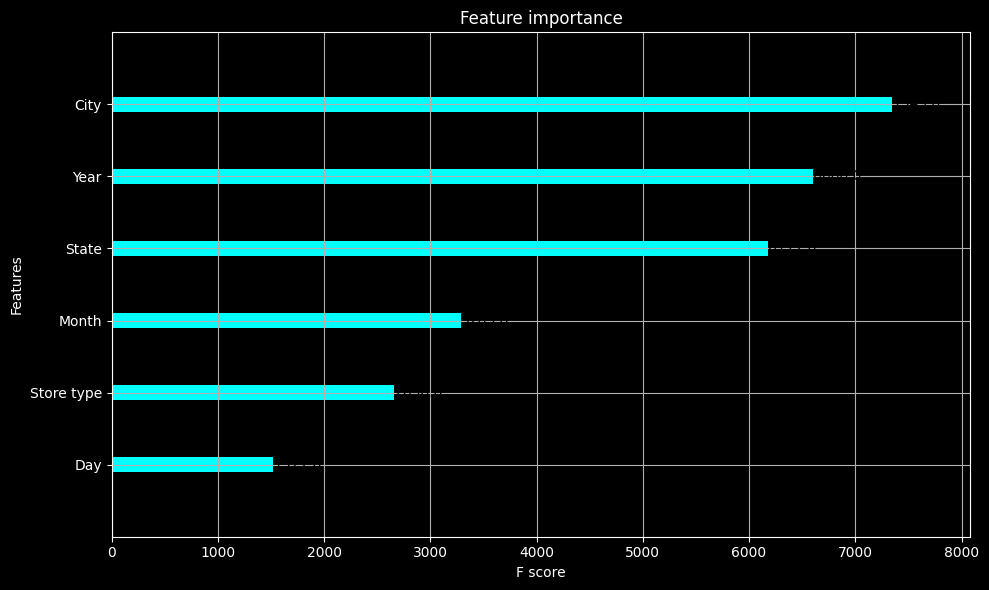

In [151]:
plt.figure(figsize=(10, 6), facecolor='black')
ax = plt.gca()
plot_importance(xgb_model, ax=ax, max_num_features=10, color='cyan')
ax.set_facecolor('black')
ax.tick_params(axis='both', colors='white')
ax.spines[:].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
plt.tight_layout()
plt.savefig('feature_importance_xgb_model.png')
plt.show()

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [153]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=4,
    min_samples_split=10,
    max_features=0.6,
    random_state=42
)

In [154]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, max_features=0.6, min_samples_split=10,
                      n_estimators=200, random_state=42)

In [155]:
y_pred=rf_model.predict(x_test)
y_true=y_test

In [156]:
print("RF Metrics:")
print(f"MAE: ${mean_absolute_error(y_true, y_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
print(f"R²: {r2_score(y_true, y_pred):.2%}")
print(f"Mean Error: {np.mean(np.abs(y_true - y_pred)/y_true):.2%}")

RF Metrics:
MAE: $1.04
RMSE: $1.42
R²: 90.05%
Mean Error: 9.07%


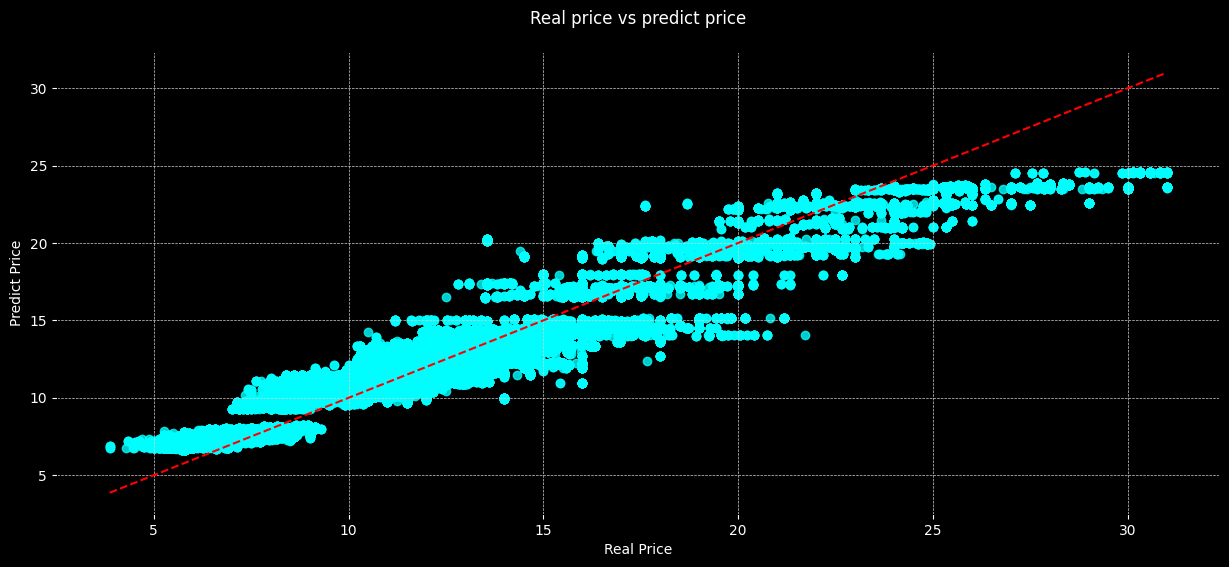

In [157]:
plt.figure(figsize=(15, 6), facecolor='black')
plt.gca().set_facecolor('black')
plt.scatter(y_true, y_pred, alpha=0.8, color='cyan')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--")
plt.xlabel("Real Price", color='white')
plt.ylabel("Predict Price", color='white')
plt.title("Real price vs predict price", color='white', pad=20)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
plt.savefig('RF_model_predictions.png')
plt.show()

In [164]:
base_models = [
    ('XGB', XGBRegressor(
    subsample= 0.8,
    reg_lambda= 1,
    reg_alpha= 1,
    max_depth= 5,
    learning_rate= 0.05,
    gamma= 0.2,
    colsample_bytree= 0.8,
    objective="reg:squarederror",
    n_estimators=500
    )),
    ('RF', RandomForestRegressor(
    n_estimators=200,
    max_depth=4,
    min_samples_split=10,
    max_features=0.6,
    random_state=42
    ))
    ]

In [165]:
meta_model = LinearRegression()

In [166]:
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    passthrough=False,  # Si True, incluye las features originales + predicciones
    n_jobs=-1
    )

In [167]:
stacking_model.fit(x_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.2,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning...
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('RF',
                               RandomForestRegressor(max_depth=4,
                                                     max_features=0.6,
                                                     min_samples_split=10,
                                                     n_estimators=200,
                                                     random_state=42))],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [168]:
y_pred = stacking_model.predict(x_test)
y_true = y_test

In [169]:
print("SM Metrics:")
print(f"MAE: ${mean_absolute_error(y_true, y_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
print(f"R²: {r2_score(y_true, y_pred):.2%}")
print(f"Mean Error: {np.mean(np.abs(y_true - y_pred)/y_true):.2%}")

SM Metrics:
MAE: $0.39
RMSE: $0.54
R²: 98.57%
Mean Error: 3.34%


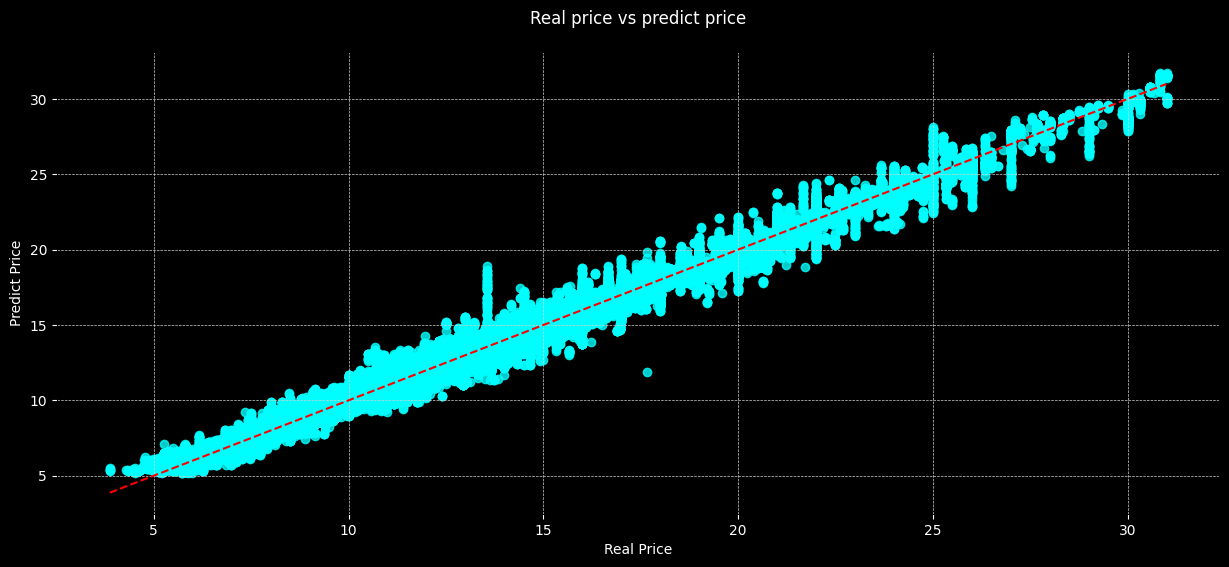

In [170]:
plt.figure(figsize=(15, 6), facecolor='black')
plt.gca().set_facecolor('black')
plt.scatter(y_true, y_pred, alpha=0.8, color='cyan')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--")
plt.xlabel("Real Price", color='white')
plt.ylabel("Predict Price", color='white')
plt.title("Real price vs predict price", color='white', pad=20)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
plt.savefig('SM_model_predictions.png')
plt.show()

In [173]:
param_grid = {
    'xgb__learning_rate': [0.05, 0.1],
    'rf__max_depth': [4, 5]
}

grid_search = RandomizedSearchCV(
    estimator=stacking_model,
    param_distributions=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [174]:
'''
grid_search.fit(x_train, y_train)
print(f"Best parámeters: {grid_search.best_params_}")'''

'\ngrid_search.fit(x_train, y_train)\nprint(f"Best parámeters: {grid_search.best_params_}")'

In [175]:
pred_xgb = stacking_model.estimators_[0].predict(x_test)
pred_rf = stacking_model.estimators_[1].predict(x_test)
pred_stacking = stacking_model.predict(x_test)

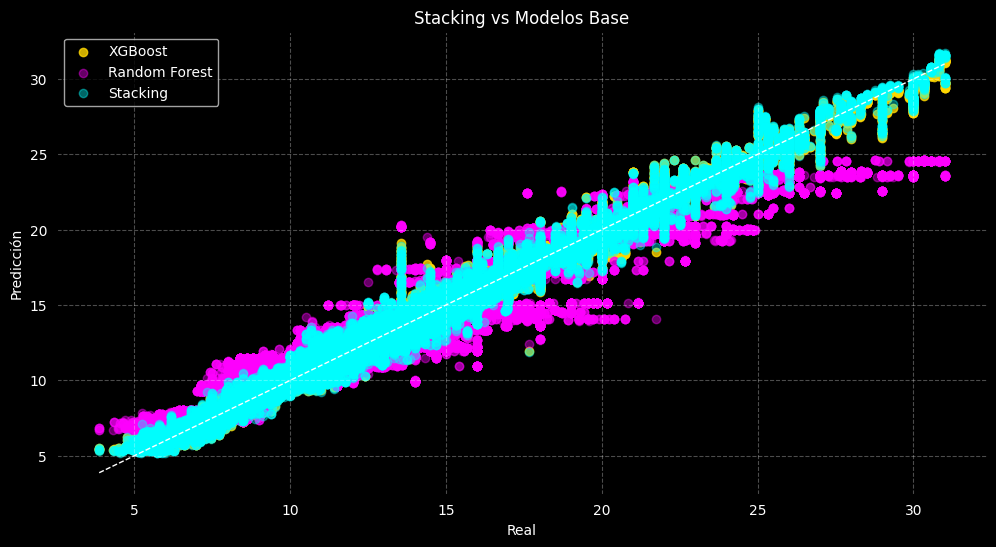

In [179]:
plt.figure(figsize=(12, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.scatter(y_test, pred_xgb, alpha=0.8, label='XGBoost', color='gold')
plt.scatter(y_test, pred_rf, alpha=0.4, label='Random Forest', color='magenta')
plt.scatter(y_test, pred_stacking, alpha=0.4, label='Stacking', color='cyan')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='white', linewidth=1)
plt.xlabel("Real", color='white')
plt.ylabel("Predicción", color='white')
plt.title("Stacking vs Modelos Base", color='white')
plt.legend(facecolor='black', labelcolor='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(linestyle='--', alpha=0.3, color='white')
plt.show()

In [180]:
from joblib import dump

In [181]:
dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [182]:
from joblib import load

In [183]:
load_model = load('random_forest_model.joblib')